# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings

In [2]:
# Import Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import the libraries you will be using for analysis
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)


numpy version: 1.26.4
pandas version: 2.2.3
matplotlib version: 3.9.2
seaborn version: 0.13.2


In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.3
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [10]:
# Try loading one file

df = pd.read_parquet('/Users/create/Desktop/DA/Datasets/Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [16]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/Users/create/Desktop/DA/Datasets/Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir('/Users/create/Desktop/DA/Datasets/Datasets and Dictionary/trip_records')

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
        for file_name in file_list:
        try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df = pd.read_parquet(file_path)

        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

        df['date'] = df['tpep_pickup_datetime'].dt.date
        df['hour'] = df['tpep_pickup_datetime'].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in df['date'].unique():
            date_data = df[df['date'] == date]
            # Iterate through each hour of the selected date
        for hour in range(24):
            hour_data = date_data[date_data['hour'] == hour]
            # Sample 5% of the hourly data randomly
        if not hour_data.empty:
            sample = hour_data.sample(frac=0.0075, random_state=42)
            # add data of this hour to the dataframe
        sampled_data = pd.concat([sampled_data, sample])
        # Concatenate the sampled data of all the dates to a single dataframe
        df = # we initialised this empty DF earlier

        except Exception as e:
        print(f"Error reading file {file_name}: {e}")

IndentationError: unexpected indent (2916113932.py, line 20)

In [ ]:
import os
import pandas as pd

# Set the directory containing the data files
os.chdir('/Users/create/Desktop/DA/Datasets/Datasets and Dictionary/trip_records')

# Create a list of all the files to read
file_list = os.listdir('/Users/create/Desktop/DA/Datasets/Datasets and Dictionary/trip_records')

# Initialize an empty DataFrame to store the final sampled data
final_sampled_data = pd.DataFrame()

# Iterate through the list of files and sample one by one
for file_name in file_list:
    try:
        # File path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df = pd.read_parquet(file_path)

        # Convert pickup datetime to datetime format
        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

        # Extract date and hour from the pickup datetime
        df['date'] = df['tpep_pickup_datetime'].dt.date
        df['hour'] = df['tpep_pickup_datetime'].dt.hour

        # Initialize an empty DataFrame to store sampled data for the current file
        sampled_data = pd.DataFrame()

        # Loop through each unique date in the file
        for date in df['date'].unique():
            date_data = df[df['date'] == date]

            # Loop through each hour of the selected date
            for hour in range(24):
                hour_data = date_data[date_data['hour'] == hour]

                # Sample 0.75% of the hourly data randomly
                if not hour_data.empty:
                    sample = hour_data.sample(frac=0.0075, random_state=42)
                    sampled_data = pd.concat([sampled_data, sample])

        # Append the sampled data from the current file to the final DataFrame
        final_sampled_data = pd.concat([final_sampled_data, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Save the final sampled data to a Parquet file
final_sampled_data.to_parquet('/Users/create/Desktop/DA/sampled_trip_data.parquet')

In [22]:
final_sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284492 entries, 1788 to 3206885
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               284492 non-null  int64         
 1   tpep_pickup_datetime   284492 non-null  datetime64[us]
 2   tpep_dropoff_datetime  284492 non-null  datetime64[us]
 3   passenger_count        275065 non-null  float64       
 4   trip_distance          284492 non-null  float64       
 5   RatecodeID             275065 non-null  float64       
 6   store_and_fwd_flag     275065 non-null  object        
 7   PULocationID           284492 non-null  int64         
 8   DOLocationID           284492 non-null  int64         
 9   payment_type           284492 non-null  int64         
 10  fare_amount            284492 non-null  float64       
 11  extra                  284492 non-null  float64       
 12  mta_tax                284492 non-null  float

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [23]:
# Store the df in csv/parquet
df.to_parquet('/Users/create/Desktop/DA/sampled_trip_data.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [25]:
# Load the new data file
df1 = pd.read_parquet('/Users/create/Desktop/DA/sampled_trip_data.parquet')


In [26]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,date,hour
0,1,2023-06-01 00:08:48,2023-06-01 00:29:41,1.0,3.40,1.0,N,140,238,1,...,3.50,0.5,6.70,0.0,1.0,33.60,2.5,0.00,2023-06-01,0
1,1,2023-06-01 00:15:04,2023-06-01 00:25:18,0.0,3.40,1.0,N,50,151,1,...,3.50,0.5,3.00,0.0,1.0,23.60,2.5,0.00,2023-06-01,0
2,1,2023-06-01 00:48:24,2023-06-01 01:07:07,1.0,10.20,1.0,N,138,97,1,...,7.75,0.5,10.00,0.0,1.0,60.05,0.0,1.75,2023-06-01,0
3,2,2023-06-01 00:54:03,2023-06-01 01:17:29,3.0,9.83,1.0,N,100,244,1,...,1.00,0.5,8.88,0.0,1.0,53.28,2.5,0.00,2023-06-01,0
4,2,2023-06-01 00:18:44,2023-06-01 00:27:18,1.0,1.17,1.0,N,137,234,1,...,1.00,0.5,0.72,0.0,1.0,15.02,2.5,0.00,2023-06-01,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3275796 entries, 0 to 3307233
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [28]:
# Fix the index and drop any columns that are not needed
df1.isnull().sum()


VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          99310
trip_distance                0
RatecodeID               99310
store_and_fwd_flag       99310
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     99310
Airport_fee              99310
date                         0
hour                         0
dtype: int64

In [29]:
df1 = df1.drop('store_and_fwd_flag',axis = 1)

In [30]:
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,date,hour
0,1,2023-06-01 00:08:48,2023-06-01 00:29:41,1.0,3.40,1.0,140,238,1,21.9,3.50,0.5,6.70,0.0,1.0,33.60,2.5,0.00,2023-06-01,0
1,1,2023-06-01 00:15:04,2023-06-01 00:25:18,0.0,3.40,1.0,50,151,1,15.6,3.50,0.5,3.00,0.0,1.0,23.60,2.5,0.00,2023-06-01,0
2,1,2023-06-01 00:48:24,2023-06-01 01:07:07,1.0,10.20,1.0,138,97,1,40.8,7.75,0.5,10.00,0.0,1.0,60.05,0.0,1.75,2023-06-01,0
3,2,2023-06-01 00:54:03,2023-06-01 01:17:29,3.0,9.83,1.0,100,244,1,39.4,1.00,0.5,8.88,0.0,1.0,53.28,2.5,0.00,2023-06-01,0
4,2,2023-06-01 00:18:44,2023-06-01 00:27:18,1.0,1.17,1.0,137,234,1,9.3,1.00,0.5,0.72,0.0,1.0,15.02,2.5,0.00,2023-06-01,0


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [33]:
# Combine the two airport fee columns

In [43]:
# Check if 'airport_fee' exists in the DataFrame
if 'airport_fee' in df1.columns:
    # Combine the two airport fee columns (if applicable)
    df1['airport_fee'] = df1['airport_fee'] + df1['airport_fee']
else:
    print("Column 'airport_fee' does not exist in the DataFrame.")

Column 'airport_fee' does not exist in the DataFrame.


In [46]:
df1.Airport_fee.value_counts()


Airport_fee
 0.00    2891165
 1.75     285283
-1.75         38
Name: count, dtype: int64

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [47]:
# check where values of fare amount are negative
df1[df1['fare_amount'] < 0]


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,date,hour


Did you notice something different in the `RatecodeID` column for above records?

In [49]:
# Analyse RatecodeID for the negative fare amounts
df1[df1['RatecodeID'] < 0]


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,date,hour


In [50]:
# Find which columns have negative values

df1.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee', 'date', 'hour'],
      dtype='object')

In [51]:
df1[(df1[['extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
        'congestion_surcharge', 'Airport_fee']] < 0).any(axis=1)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,date,hour
17526,2,2023-06-01 09:50:44,2023-06-01 10:43:12,1.0,17.07,2.0,162,132,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00,2023-06-01,9
21470,2,2023-06-01 10:49:08,2023-06-01 12:01:57,1.0,19.17,2.0,132,249,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-5.75,-2.5,-1.75,2023-06-01,10
22895,2,2023-06-01 10:47:04,2023-06-01 10:48:37,4.0,0.00,5.0,132,132,2,0.0,0.0,0.0,0.0,0.0,-1.0,-2.75,0.0,-1.75,2023-06-01,10
23165,2,2023-06-01 10:43:51,2023-06-01 10:44:27,2.0,0.00,2.0,163,163,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00,2023-06-01,10
28790,2,2023-06-01 11:45:07,2023-06-01 11:45:22,3.0,0.00,3.0,158,158,2,0.0,0.0,0.0,0.0,0.0,-1.0,-1.00,0.0,0.00,2023-06-01,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075228,2,2023-06-29 17:52:22,2023-06-29 18:11:03,1.0,2.93,1.0,246,239,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00,2023-06-29,17
3088427,2,2023-06-29 19:37:01,2023-06-29 19:38:36,1.0,0.02,1.0,141,141,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00,2023-06-29,19
3116192,2,2023-06-30 00:23:27,2023-06-30 00:23:36,2.0,0.00,2.0,144,144,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00,2023-06-30,0
3173025,2,2023-06-30 17:16:34,2023-06-30 17:17:04,2.0,0.00,2.0,236,236,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00,2023-06-30,17


In [52]:
# fix these negative values
df1['extra'].value_counts()


extra
0.00     1250719
2.50      818688
1.00      644381
5.00      239448
3.50      195655
6.00       30463
7.50       29733
4.25       16828
9.25       15031
1.75        8836
2.75        6596
6.75        6085
10.25       4321
7.75        3786
11.75       3184
10.00       1045
8.50         773
5.25          77
3.20          23
3.25          23
0.75          21
1.50          13
0.50          12
14.25          6
2.45           5
12.75          5
0.25           4
11.00          3
0.04           3
4.50           3
0.70           3
7.45           2
0.03           2
0.05           2
0.11           2
2.00           1
0.01           1
2.15           1
2.70           1
2.80           1
2.25           1
0.06           1
8.20           1
12.50          1
13.00          1
11.25          1
9.50           1
0.02           1
5.75           1
3.80           1
Name: count, dtype: int64

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [53]:
# Find the proportion of missing values in each column

100*df1.isnull().mean()

VendorID                 0.00000
tpep_pickup_datetime     0.00000
tpep_dropoff_datetime    0.00000
passenger_count          3.03163
trip_distance            0.00000
RatecodeID               3.03163
PULocationID             0.00000
DOLocationID             0.00000
payment_type             0.00000
fare_amount              0.00000
extra                    0.00000
mta_tax                  0.00000
tip_amount               0.00000
tolls_amount             0.00000
improvement_surcharge    0.00000
total_amount             0.00000
congestion_surcharge     3.03163
Airport_fee              3.03163
date                     0.00000
hour                     0.00000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [54]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df1[df1['passenger_count'].isnull()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,date,hour
3207347,1,2023-06-01 00:08:44,2023-06-01 00:16:43,NaN,2.60,NaN,48,238,0,12.80,1.00,0.5,2.67,0.00,1.0,20.47,NaN,NaN,2023-06-01,0
3207348,2,2023-06-01 00:29:23,2023-06-01 00:47:10,NaN,8.51,NaN,137,181,0,27.27,0.00,0.5,6.17,6.55,1.0,43.99,NaN,NaN,2023-06-01,0
3207349,2,2023-06-01 00:13:00,2023-06-01 00:39:00,NaN,5.69,NaN,234,225,0,30.06,0.00,0.5,0.00,0.00,1.0,34.06,NaN,NaN,2023-06-01,0
3207350,2,2023-06-01 00:48:36,2023-06-01 01:23:05,NaN,8.98,NaN,141,188,0,42.97,0.00,0.5,0.00,0.00,1.0,46.97,NaN,NaN,2023-06-01,0
3207351,2,2023-06-01 00:57:29,2023-06-01 01:21:34,NaN,5.34,NaN,164,97,0,24.57,0.00,0.5,5.71,0.00,1.0,34.28,NaN,NaN,2023-06-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307229,2,2023-06-30 23:30:21,2023-07-01 00:00:46,NaN,9.20,NaN,42,148,0,38.53,0.00,0.5,8.51,0.00,1.0,51.04,NaN,NaN,2023-06-30,23
3307230,1,2023-06-30 23:34:22,2023-07-01 00:32:59,NaN,20.20,NaN,132,74,0,70.00,1.75,0.5,11.97,6.55,1.0,91.77,NaN,NaN,2023-06-30,23
3307231,2,2023-06-30 23:45:00,2023-07-01 00:10:00,NaN,6.16,NaN,256,140,0,28.03,0.00,0.5,6.41,0.00,1.0,38.44,NaN,NaN,2023-06-30,23
3307232,2,2023-06-30 23:13:38,2023-06-30 23:51:19,NaN,11.65,NaN,91,246,0,45.74,0.00,0.5,0.00,6.55,1.0,56.29,NaN,NaN,2023-06-30,23


In [55]:
df1['passenger_count'] = df1['passenger_count'].fillna(0)

In [56]:
df1['passenger_count'].isnull().sum()

0

Did you find zeroes in passenger_count? Handle these.

In [57]:
df1['passenger_count'].mode()

0    1.0
Name: passenger_count, dtype: float64

In [58]:
df1['passenger_count'].median()

1.0

In [59]:
df1['passenger_count'] = df1['passenger_count'].replace(0, 1)

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [60]:
# Fix missing values in 'RatecodeID'
df1['RatecodeID'].isnull().sum()

99310

In [61]:
df1['RatecodeID'].median()

1.0

In [62]:
df1['RatecodeID'] = df1['RatecodeID'].astype(float).fillna(1.0)

In [63]:
df1['RatecodeID'].isnull().sum()

0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [64]:
# handle null values in congestion_surcharge
df1['congestion_surcharge'].isnull().sum()



99310

In [65]:
df1['congestion_surcharge'].value_counts()

congestion_surcharge
 2.50    2927795
 0.00     248590
-2.50         99
 1.00          1
 0.75          1
Name: count, dtype: int64

In [66]:
df1['congestion_surcharge'].median()

2.5

In [67]:
df1['congestion_surcharge'] = df1['congestion_surcharge'].fillna(2.5)

In [68]:
df1['congestion_surcharge'].isnull().sum()

0

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [69]:
# Handle any remaining missing values
df1.isnull().sum()


VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
Airport_fee              99310
date                         0
hour                         0
dtype: int64

In [70]:
df1['Airport_fee'].mean()

0.1571481032814248

In [71]:
df1['Airport_fee'].value_counts()

Airport_fee
 0.00    2891165
 1.75     285283
-1.75         38
Name: count, dtype: int64

In [73]:
df1['Airport_fee'] = df1['Airport_fee'].fillna(0.0)

In [75]:
df1['Airport_fee'].value_counts(dropna=False)

Airport_fee
 0.00    2990475
 1.75     285283
-1.75         38
Name: count, dtype: int64

In [77]:
df1 = df1.drop('Airport_fee' , axis = 1)

In [78]:
df1.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
date                     0
hour                     0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [79]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df1.describe()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,hour
count,3.275796e+06,3275796,3275796,3.275796e+06,3.275796e+06,3.275796e+06,3.275796e+06,3.275796e+06,3.275796e+06,3.275796e+06,3.275796e+06,3.275796e+06,3.275796e+06,3.275796e+06,3.275796e+06,3.275796e+06,3.275796e+06,3.275796e+06
mean,1.734740e+00,2023-06-15 18:06:20.461846,2023-06-15 18:24:05.545134,1.374397e+00,4.381530e+00,1.533975e+00,1.649418e+02,1.638509e+02,1.166850e+00,2.037903e+01,1.646348e+00,4.950577e-01,3.628654e+00,6.173883e-01,9.992190e-01,2.959558e+01,2.310131e+00,1.424300e+01
min,1.000000e+00,2002-12-31 23:03:19,2002-12-31 23:06:17,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.000000e-01,0.000000e+00,0.000000e+00,-1.000000e+00,-5.750000e+00,-2.500000e+00,0.000000e+00
25%,1.000000e+00,2023-06-08 09:09:51.500000,2023-06-08 09:27:12,1.000000e+00,1.090000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.610000e+01,2.500000e+00,1.000000e+01
50%,2.000000e+00,2023-06-15 14:10:44,2023-06-15 14:31:23,1.000000e+00,1.820000e+00,1.000000e+00,1.610000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.880000e+00,0.000000e+00,1.000000e+00,2.136000e+01,2.500000e+00,1.500000e+01
75%,2.000000e+00,2023-06-23 02:12:43.750000,2023-06-23 02:28:10.500000,1.000000e+00,3.540000e+00,1.000000e+00,2.330000e+02,2.340000e+02,1.000000e+00,2.260000e+01,2.500000e+00,5.000000e-01,4.500000e+00,0.000000e+00,1.000000e+00,3.144000e+01,2.500000e+00,1.900000e+01
max,6.000000e+00,2023-07-01 00:42:13,2023-07-03 16:31:24,9.000000e+00,1.852505e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,3.869836e+05,1.425000e+01,5.750000e+00,7.118800e+02,6.655600e+02,1.000000e+00,3.869876e+05,2.500000e+00,2.300000e+01
std,4.491018e-01,NaN,NaN,8.692597e-01,2.291309e+02,6.691836e+00,6.404602e+01,7.005871e+01,5.011792e-01,2.146368e+02,1.854487e+00,4.985039e-02,4.204040e+00,2.247881e+00,2.749851e-02,2.150953e+02,6.625708e-01,5.898328e+00


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [80]:
# remove passenger_count > 6
df1['passenger_count'].value_counts()

passenger_count
1.0    2540660
2.0     478397
3.0     121063
4.0      65868
5.0      40792
6.0      28980
8.0         24
9.0          6
7.0          6
Name: count, dtype: int64

In [81]:
# remove passenger_count > 6
df1 = df1[df1['passenger_count'] <= 6]

In [82]:
df1['passenger_count'].value_counts()

passenger_count
1.0    2540660
2.0     478397
3.0     121063
4.0      65868
5.0      40792
6.0      28980
Name: count, dtype: int64

In [83]:
# Continue with outlier handling
df1['trip_distance'].value_counts()


trip_distance
0.90        44783
1.00        44760
0.00        44024
1.10        43874
0.80        43041
            ...  
34.43           1
36.23           1
33.51           1
46.83           1
20314.00        1
Name: count, Length: 4848, dtype: int64

In [84]:
df1[df1['trip_distance'] <= 250]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour
0,1,2023-06-01 00:08:48,2023-06-01 00:29:41,1.0,3.40,1.0,140,238,1,21.90,3.50,0.5,6.70,0.00,1.0,33.60,2.5,2023-06-01,0
1,1,2023-06-01 00:15:04,2023-06-01 00:25:18,1.0,3.40,1.0,50,151,1,15.60,3.50,0.5,3.00,0.00,1.0,23.60,2.5,2023-06-01,0
2,1,2023-06-01 00:48:24,2023-06-01 01:07:07,1.0,10.20,1.0,138,97,1,40.80,7.75,0.5,10.00,0.00,1.0,60.05,0.0,2023-06-01,0
3,2,2023-06-01 00:54:03,2023-06-01 01:17:29,3.0,9.83,1.0,100,244,1,39.40,1.00,0.5,8.88,0.00,1.0,53.28,2.5,2023-06-01,0
4,2,2023-06-01 00:18:44,2023-06-01 00:27:18,1.0,1.17,1.0,137,234,1,9.30,1.00,0.5,0.72,0.00,1.0,15.02,2.5,2023-06-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307229,2,2023-06-30 23:30:21,2023-07-01 00:00:46,1.0,9.20,1.0,42,148,0,38.53,0.00,0.5,8.51,0.00,1.0,51.04,2.5,2023-06-30,23
3307230,1,2023-06-30 23:34:22,2023-07-01 00:32:59,1.0,20.20,1.0,132,74,0,70.00,1.75,0.5,11.97,6.55,1.0,91.77,2.5,2023-06-30,23
3307231,2,2023-06-30 23:45:00,2023-07-01 00:10:00,1.0,6.16,1.0,256,140,0,28.03,0.00,0.5,6.41,0.00,1.0,38.44,2.5,2023-06-30,23
3307232,2,2023-06-30 23:13:38,2023-06-30 23:51:19,1.0,11.65,1.0,91,246,0,45.74,0.00,0.5,0.00,6.55,1.0,56.29,2.5,2023-06-30,23


In [85]:
df1[df1['tip_amount'] > 100]['tip_amount']

27143      110.00
64363      180.00
150998     140.00
152706     150.00
185416     111.00
250362     120.00
300354     145.00
303950     121.00
327209     110.00
466674     220.00
468692     220.00
707140     150.29
722527     112.00
727856     111.14
756743     249.00
779419     150.00
843933     140.00
952007     100.01
1028592    444.00
1031733    157.00
1061930    300.00
1104905    502.68
1143697    240.00
1148641    107.40
1152364    113.00
1263803    140.00
1360590    107.39
1418329    100.11
1508341    134.00
1526577    386.00
1553395    155.55
1558908    115.00
1618036    100.29
1664882    107.05
1798480    211.00
1802802    101.19
1861053    200.00
1988758    116.00
2058138    150.00
2084473    110.00
2087047    104.36
2131095    388.00
2232415    150.00
2277238    130.00
2280037    200.00
2301955    222.00
2406420    125.00
2468539    160.00
2516701    110.10
2699538    102.48
2706097    711.88
2723514    115.00
2738209    117.51
2807867    225.00
2880056    206.65
2918188   

In [86]:
df1['payment_type'] = df1['payment_type'].replace(0,1)

In [ ]:
# Do any columns need standardising?


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [87]:
# Categorical Variables

# Following variables represent categories or identifiers rather than numerical values for analysis:

# VendorID: present the taxi vendor, treated as categorical.

# RatecodeID: Identifies different rate codes (e.g., standard, airport), categorical.

# PULocationID: Pickup location identifier, categorical.

# DOLocationID: Drop-off location identifier, categorical.

# payment_type: Specifies the payment method, categorical.


# Numerical Variables

# Following variables carry continuous or discrete numerical values:

# tpep_pickup_datetime: present a timestamp, but can be handled numerically for time-based analysis.

# tpep_dropoff_datetime: Similar to pickup datetime, numerical for calculations.

# passenger_count: Number of passengers, numerical.

# trip_distance: Distance traveled, numerical.

# pickup_hour: Derived from the timestamp, numerical.

# trip_duration: Duration of the trip, numerical.

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

NotADirectoryError: [Errno 20] Not a directory: '/Users/create/Desktop/DA/sampled_trip_data.parquet/hourlytrends.png'

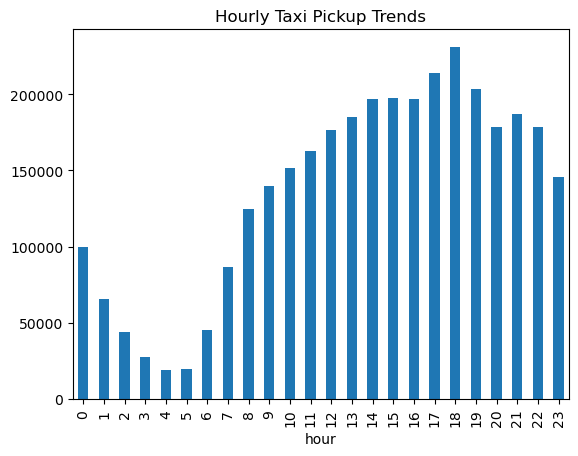

In [88]:
# Find and show the hourly trends in taxi pickups
# Find and show the hourly trends in taxi picks 
df1.groupby('hour')['tpep_pickup_datetime'].count().plot(kind='bar', title='Hourly Taxi Pickup Trends')
plt.savefig('/Users/create/Desktop/DA/sampled_trip_data.parquet/hourlytrends.png')
plt.show()

In [89]:
# Find and show the daily trends in taxi pickups (days of the week)
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
# Need to extract day of the week 
df1['day_of_week'] = df1['tpep_pickup_datetime'].dt.dayofweek
#to get the count of daily_pickups 
daily_pickups = df1.groupby('day_of_week')['tpep_pickup_datetime'].count()
# creating a list of day names 
day_names = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
# Mapping the day _names to the index of daily_pickups 
daily_pickups.index = daily_pickups.index.map(lambda x: day_names[x])


NotADirectoryError: [Errno 20] Not a directory: '/Users/create/Desktop/DA/sampled_trip_data.parquet/dailytrends.png'

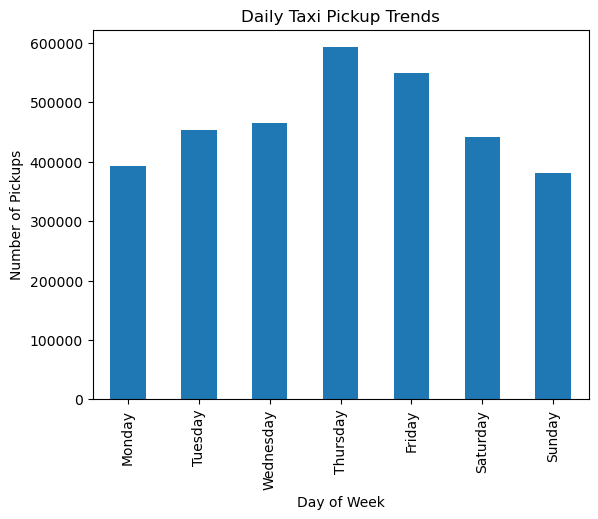

In [94]:
daily_pickups.plot(kind = 'bar' , title = 'Daily Taxi Pickup Trends')
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.savefig ('/Users/create/Desktop/DA/sampled_trip_data.parquet/dailytrends.png')
plt.show()

In [91]:
# Daily trends shows that maximum pick up in thursday, friday, saturday and sunday

In [92]:
df1['tpep_pickup_datetime'].value_counts()

tpep_pickup_datetime
2023-06-09 19:45:03    11
2023-06-28 10:51:34    11
2023-06-06 17:40:32    11
2023-06-02 12:15:55    11
2023-06-22 17:42:58    11
                       ..
2023-06-15 10:19:46     1
2023-06-15 10:48:41     1
2023-06-15 10:59:23     1
2023-06-15 10:15:15     1
2023-06-30 23:45:00     1
Name: count, Length: 1659133, dtype: int64

In [93]:
# Show the monthly trends in pickups
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
# Need to extract day of the week 
df1['month_of_year'] = df1['tpep_pickup_datetime'].dt.month
#to get the count of daily_pickups 
monthly_pickups = df1.groupby('month_of_year')['tpep_pickup_datetime'].count()
# creating a list of day names 
month_names = ['January','February','March','April','May','June','July', 'August','September', 'October' , 'November' , 'December' ]
# Mapping the day _names to the index of daily_pickups 
monthly_pickups.index = monthly_pickups.index.map(lambda x: month_names[x -1])


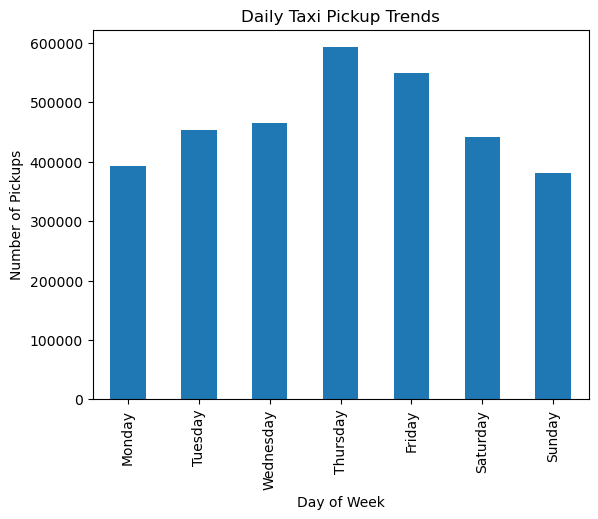

In [97]:
# Save the daily trends plot to a valid directory
daily_pickups.plot(kind='bar', title='Daily Taxi Pickup Trends')
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.savefig('/Users/create/Desktop/DA/dailytrends.png')  # Save to a valid folder
plt.show()

In [98]:
df1['tpep_pickup_datetime'].value_counts()

tpep_pickup_datetime
2023-06-09 19:45:03    11
2023-06-28 10:51:34    11
2023-06-06 17:40:32    11
2023-06-02 12:15:55    11
2023-06-22 17:42:58    11
                       ..
2023-06-15 10:19:46     1
2023-06-15 10:48:41     1
2023-06-15 10:59:23     1
2023-06-15 10:15:15     1
2023-06-30 23:45:00     1
Name: count, Length: 1659133, dtype: int64

In [ ]:
# # Show the monthly trends in pickups

In [ ]:
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
# Need to extract day of the week 
df1['month_of_year'] = df1['tpep_pickup_datetime'].dt.month
#to get the count of daily_pickups 
monthly_pickups = df1.groupby('month_of_year')['tpep_pickup_datetime'].count()
# creating a list of day names 
month_names = ['January','February','March','April','May','June','July', 'August','September', 'October' , 'November' , 'December' ]
# Mapping the day _names to the index of daily_pickups 
monthly_pickups.index = monthly_pickups.index.map(lambda x: month_names[x -1])

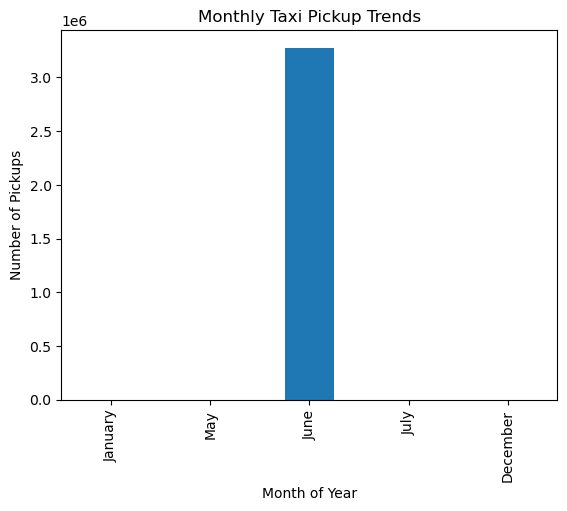

In [102]:
# Save the monthly trends plot to a valid directory
monthly_pickups.plot(kind='bar', title='Monthly Taxi Pickup Trends')
plt.xlabel('Month of Year')
plt.ylabel('Number of Pickups')
plt.savefig('/Users/create/Desktop/DA/monthlytrends.png')  # Save to a valid folder
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [103]:
# Analyse the above parameters

df1[df1[['fare_amount','tip_amount','total_amount','trip_distance']] < 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,day_of_week,month_of_year
0,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307229,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3307230,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3307231,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3307232,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
any_negative = (df1[['fare_amount','tip_amount','total_amount','trip_distance']] < 0).any().any()
print(any_negative)

True


In [105]:
df1[['fare_amount','tip_amount','total_amount','trip_distance']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 3275760 entries, 0 to 3307233
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   fare_amount    float64
 1   tip_amount     float64
 2   total_amount   float64
 3   trip_distance  float64
dtypes: float64(4)
memory usage: 125.0 MB


In [106]:
df1[['fare_amount','tip_amount','total_amount','trip_distance']].isnull().sum()

fare_amount      0
tip_amount       0
total_amount     0
trip_distance    0
dtype: int64

In [107]:
df1[df1[['fare_amount','tip_amount','total_amount','trip_distance']] < 0] = 0

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [108]:
# Create a df with non zero entries for the selected parameters.
df1[df1[['fare_amount','tip_amount','total_amount','trip_distance']] != 0]


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,day_of_week,month_of_year
0,NaN,NaT,NaT,NaN,3.40,NaN,NaN,NaN,NaN,21.90,...,NaN,6.70,NaN,NaN,33.60,NaN,NaN,NaN,NaN,NaN
1,NaN,NaT,NaT,NaN,3.40,NaN,NaN,NaN,NaN,15.60,...,NaN,3.00,NaN,NaN,23.60,NaN,NaN,NaN,NaN,NaN
2,NaN,NaT,NaT,NaN,10.20,NaN,NaN,NaN,NaN,40.80,...,NaN,10.00,NaN,NaN,60.05,NaN,NaN,NaN,NaN,NaN
3,NaN,NaT,NaT,NaN,9.83,NaN,NaN,NaN,NaN,39.40,...,NaN,8.88,NaN,NaN,53.28,NaN,NaN,NaN,NaN,NaN
4,NaN,NaT,NaT,NaN,1.17,NaN,NaN,NaN,NaN,9.30,...,NaN,0.72,NaN,NaN,15.02,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307229,NaN,NaT,NaT,NaN,9.20,NaN,NaN,NaN,NaN,38.53,...,NaN,8.51,NaN,NaN,51.04,NaN,NaN,NaN,NaN,NaN
3307230,NaN,NaT,NaT,NaN,20.20,NaN,NaN,NaN,NaN,70.00,...,NaN,11.97,NaN,NaN,91.77,NaN,NaN,NaN,NaN,NaN
3307231,NaN,NaT,NaT,NaN,6.16,NaN,NaN,NaN,NaN,28.03,...,NaN,6.41,NaN,NaN,38.44,NaN,NaN,NaN,NaN,NaN
3307232,NaN,NaT,NaT,NaN,11.65,NaN,NaN,NaN,NaN,45.74,...,NaN,NaN,NaN,NaN,56.29,NaN,NaN,NaN,NaN,NaN


In [109]:
df1[df1['trip_distance'] == 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,date,hour,day_of_week,month_of_year
46,1,2023-06-01 00:50:25,2023-06-01 01:35:25,1.0,0.0,1.0,232,72,1,22.20,...,0.5,0.00,0.00,1.0,23.70,0.0,2023-06-01,0,3,6
137,2,2023-06-01 00:21:20,2023-06-01 00:35:59,1.0,0.0,1.0,237,50,2,11.40,...,0.5,0.00,0.00,1.0,16.40,2.5,2023-06-01,0,3,6
138,2,2023-06-01 00:37:06,2023-06-01 00:49:15,1.0,0.0,1.0,246,231,1,11.40,...,0.5,3.28,0.00,1.0,19.68,2.5,2023-06-01,0,3,6
671,1,2023-06-01 00:26:21,2023-06-01 00:26:38,1.0,0.0,99.0,78,78,1,47.50,...,0.5,0.00,0.00,1.0,49.00,0.0,2023-06-01,0,3,6
677,2,2023-06-01 00:08:12,2023-06-01 00:08:44,2.0,0.0,5.0,4,4,1,70.50,...,0.0,14.80,0.00,1.0,90.55,2.5,2023-06-01,0,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307168,1,2023-06-30 23:24:05,2023-06-30 23:39:30,1.0,0.0,1.0,79,100,1,13.00,...,0.5,3.60,0.00,1.0,23.60,2.5,2023-06-30,23,4,6
3307183,1,2023-06-30 23:05:24,2023-06-30 23:19:19,1.0,0.0,1.0,116,127,1,16.33,...,0.5,0.00,0.00,1.0,17.83,2.5,2023-06-30,23,4,6
3307209,1,2023-06-30 23:04:08,2023-06-30 23:13:21,1.0,0.0,1.0,48,239,1,10.56,...,0.5,0.00,0.00,1.0,14.56,2.5,2023-06-30,23,4,6
3307221,1,2023-06-30 23:24:32,2023-06-30 23:30:44,1.0,0.0,1.0,231,114,1,6.84,...,0.5,0.00,0.00,1.0,10.84,2.5,2023-06-30,23,4,6


In [113]:
any_negative = (df1['fare_amount'] < 0).any().any()
print(any_negative)

False


In [110]:
any_negative = (df1['tip_amount'] < 0).any().any()
print(any_negative)

False


In [111]:
any_negative = (df1['total_amount'] < 0).any().any()
print(any_negative)

False


In [112]:
any_negative = (df1['trip_distance'] < 0).any().any()
print(any_negative)

False


In [114]:
df1.trip_distance.replace(0,1.8)

0           3.40
1           3.40
2          10.20
3           9.83
4           1.17
           ...  
3307229     9.20
3307230    20.20
3307231     6.16
3307232    11.65
3307233     1.40
Name: trip_distance, Length: 3275760, dtype: float64

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

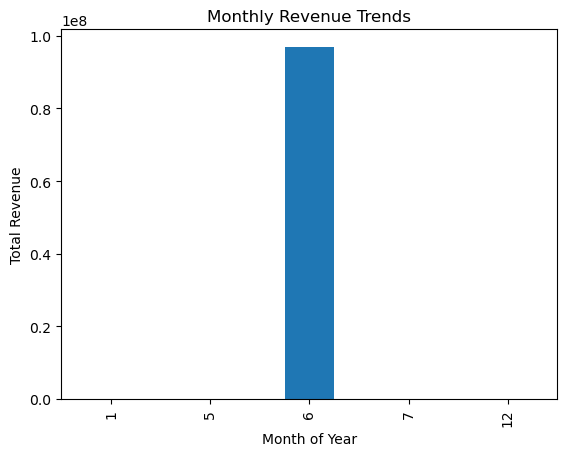

In [119]:
# Group data by month and analyse monthly revenue
import os

# Ensure the directory exists
output_dir = '/Users/create/Desktop/DA'
os.makedirs(output_dir, exist_ok=True)

# Save the monthly revenue trends plot
df1.groupby('month_of_year')['total_amount'].sum().plot.bar()
plt.xlabel('Month of Year')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue Trends')
plt.savefig(os.path.join(output_dir, '/Users/create/Desktop/DA/monthlyrevenuetrends.png'))  # Save to the valid directory
plt.show()



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [121]:

# Calculate proportion of each quarter
# Ensure the 'quarter' column exists
df1['quarter'] = pd.to_datetime(df1['tpep_pickup_datetime']).dt.quarter

# Calculate proportion of each quarter
revenue_by_quarter = df1.groupby('quarter')['total_amount'].sum().reset_index()
total_revenue = revenue_by_quarter['total_amount'].sum()
revenue_by_quarter['proportions'] = (revenue_by_quarter['total_amount'] / total_revenue) * 100

# Print the results
print("Revenue Proportion by Quarter:")
print(revenue_by_quarter[['quarter', 'proportions']])


Revenue Proportion by Quarter:
   quarter  proportions
0        1     0.000026
1        2    99.999058
2        3     0.000638
3        4     0.000278


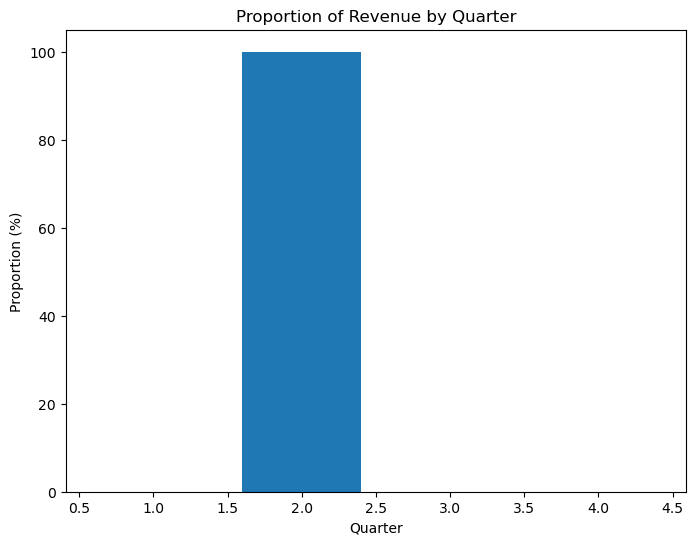

In [123]:
import os

# Ensure the directory exists
output_dir = '/Users/create/Desktop/DA'
os.makedirs(output_dir, exist_ok=True)

# Save the plot with a valid file path
plt.figure(figsize=(8, 6))
plt.bar(revenue_by_quarter['quarter'], revenue_by_quarter['proportions'])
plt.title("Proportion of Revenue by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Proportion (%)")
plt.savefig(os.path.join(output_dir, 'quarterrevenuetrends.png'))  # Correct file path
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [ ]:
# Show how trip fare is affected by distance



**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

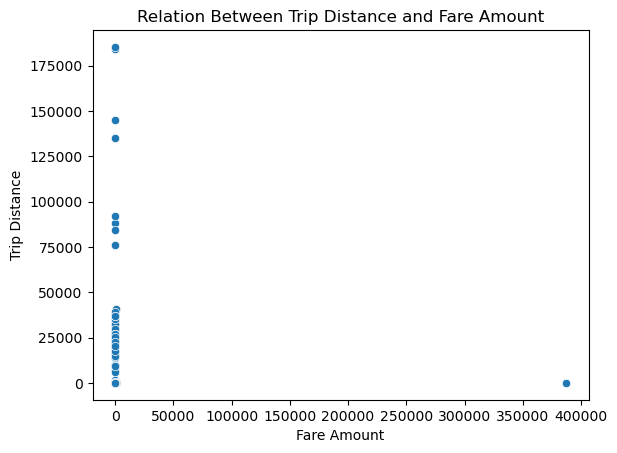

In [124]:
# Show relationship between fare and trip duration
sns.scatterplot(data = df1[df1['trip_distance'] > 0] , x = 'fare_amount' , y = 'trip_distance' )
plt.title('Relation Between Trip Distance and Fare Amount')
plt.xlabel( 'Fare Amount')
plt.ylabel('Trip Distance')
plt.savefig('/Users/create/Desktop/DA/Learn Docs-March-25/Python/DSA 77 Batch/Graded Assesement-Full Course-25-26/EDA-Assignment-May-25/Assesment-5-Final-EDA- NYC Taxis/Dataset and Dictionary-NYC/Datasets and Dictionary/trip-records/tripfaredistance.png')
plt.show()


In [ ]:
# Show relationship between fare and number of passengers

df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'])
df1['trip_duration'] = (df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime']).dt.total_seconds()
df1['trip_duration'] = df1['trip_duration']/60

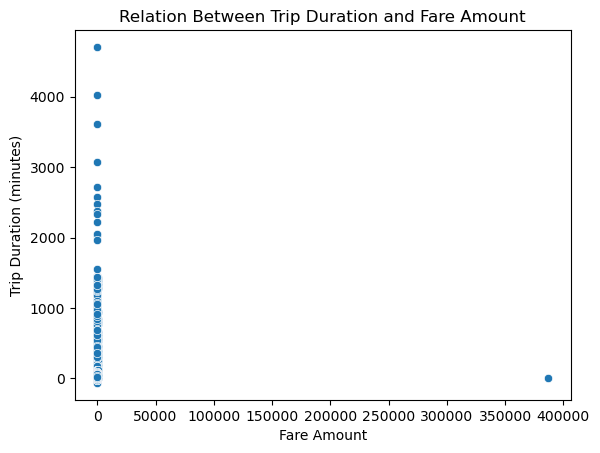

In [127]:
# Ensure the 'trip_duration' column exists
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'])
df1['trip_duration'] = (df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime']).dt.total_seconds() / 60  # Convert to minutes

# Plot the relationship between fare_amount and trip_duration
sns.scatterplot(data=df1, x='fare_amount', y='trip_duration')
plt.title('Relation Between Trip Duration and Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Trip Duration (minutes)')
plt.savefig('/Users/create/Desktop/DA/tripfareduration.png')  # Save to a valid path
plt.show()

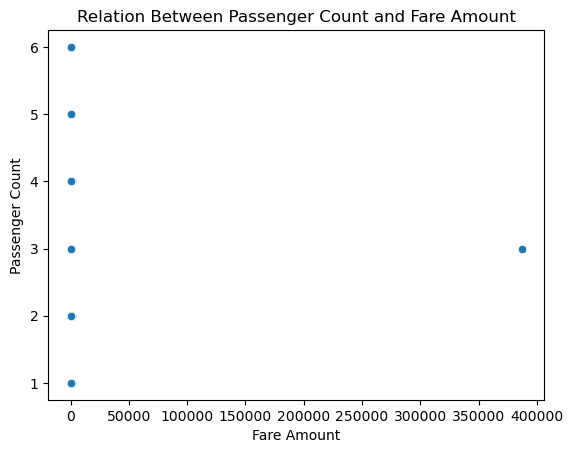

In [128]:
# Show relationship between tip and trip distance

sns.scatterplot(data = df1 , x = 'fare_amount', y = 'passenger_count')
plt.title('Relation Between Passenger Count and Fare Amount')
plt.xlabel( 'Fare Amount')
plt.ylabel('Passenger Count')
plt.savefig('/Users/create/Desktop/DA/Learn Docs-March-25/Python/DSA 77 Batch/Graded Assesement-Full Course-25-26/EDA-Assignment-May-25/Assesment-5-Final-EDA- NYC Taxis/Dataset and Dictionary-NYC/Datasets and Dictionary/trip-records/farepassenger.png')
plt.show()

In [129]:
corr_columns = ['fare_amount', 'trip_duration', 'passenger_count', 'tip_amount', 'trip_distance']
correlation_matrix = df1[corr_columns].corr()
print(correlation_matrix)

                 fare_amount  trip_duration  passenger_count  tip_amount  \
fare_amount         1.000000       0.024723         0.004464    0.051092   
trip_duration       0.024723       1.000000         0.022278    0.164831   
passenger_count     0.004464       0.022278         1.000000    0.010744   
tip_amount          0.051092       0.164831         0.010744    1.000000   
trip_distance       0.001874       0.006008        -0.000687    0.012260   

                 trip_distance  
fare_amount           0.001874  
trip_duration         0.006008  
passenger_count      -0.000687  
tip_amount            0.012260  
trip_distance         1.000000  


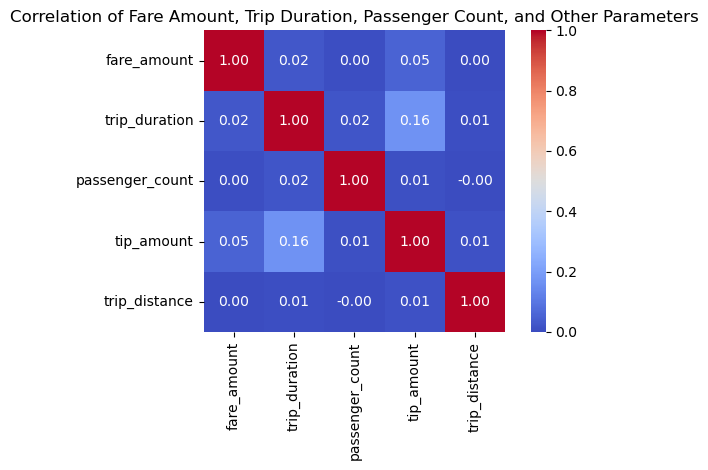

In [131]:
import os

# Ensure the directory exists
output_dir = '/Users/create/Desktop/DA'
os.makedirs(output_dir, exist_ok=True)

# Save the heatmap with a valid file path
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation of Fare Amount, Trip Duration, Passenger Count, and Other Parameters')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'heatmap.png'))  # Correct file path
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [132]:
payment_type_counts = df1['payment_type'].value_counts(normalize = True)*100
print(payment_type_counts)

payment_type
1    82.164780
2    16.648991
4     0.695197
3     0.491001
5     0.000031
Name: proportion, dtype: float64


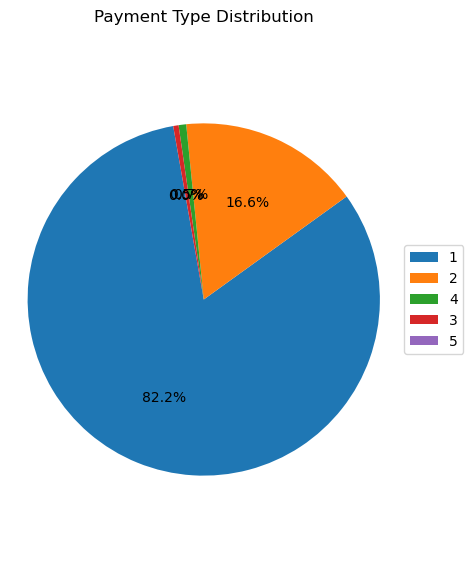

In [133]:
# Analyse the distribution of different payment types (payment_type).
payment_type_counts = df1['payment_type'].value_counts()
plt.figure(figsize = (5,7))
plt.pie(payment_type_counts, autopct='%1.1f%%', startangle=100)
plt.legend(payment_type_counts.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Payment Type Distribution')
plt.axis('equal')
plt.savefig('/Users/create/Desktop/DA/Learn Docs-March-25/Python/DSA 77 Batch/Graded Assesement-Full Course-25-26/EDA-Assignment-May-25/Assesment-5-Final-EDA- NYC Taxis/Dataset and Dictionary-NYC/Datasets and Dictionary/trip-records/paymenttype.png')
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [134]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [137]:

# Import GeoPandas
import geopandas as gpd

# Read the shapefile using GeoPandas
zones = gpd.read_file("/Users/create/Desktop/DA/Learn Docs-March-25/Python/DSA 77 Batch/Graded Assesement-Full Course-25-26/EDA-Assignment-May-25/Assesment-5-Final-EDA- NYC Taxis/Dataset and Dictionary-NYC/Datasets and Dictionary/taxi-zones/taxi_zones.shp")

# Display the first few rows of the GeoDataFrame
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((9.33e+05 1.93e+05, 9.33e+05 1.93e+05..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1.03e+06 1.72e+05, 1.03e+06 1...."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1.03e+06 2.57e+05, 1.03e+06 2.57e+05..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((9.92e+05 2.04e+05, 9.92e+05 2.04e+05..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((9.36e+05 1.44e+05, 9.36e+05 1.44e+05..."


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

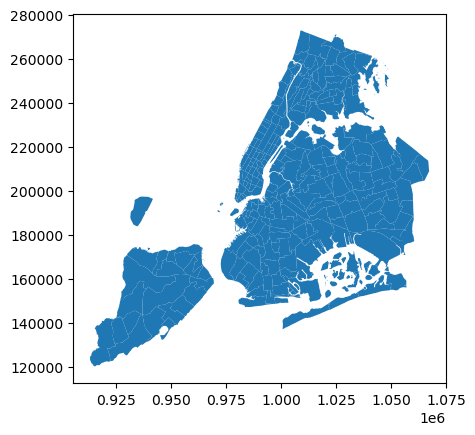

In [138]:
print(zones.info())
zones.plot()

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [18]:
# Import GeoPandas
import geopandas as gpd

# Read the shapefile using GeoPandas
zones = gpd.read_file("/Users/create/Desktop/DA/Learn Docs-March-25/Python/DSA 77 Batch/Graded Assesement-Full Course-25-26/EDA-Assignment-May-25/Assesment-5-Final-EDA- NYC Taxis/Dataset and Dictionary-NYC/Datasets and Dictionary/taxi-zones/taxi_zones.shp")

# Display the first few rows of the GeoDataFrame (optional)
print(zones.head())

   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((9.33e+05 1.93e+05, 9.33e+05 1.93e+05...  
1         Queens  MULTIPOLYGON (((1.03e+06 1.72e+05, 1.03e+06 1....  
2          Bronx  POLYGON ((1.03e+06 2.57e+05, 1.03e+06 2.57e+05...  
3      Manhattan  POLYGON ((9.92e+05 2.04e+05, 9.92e+05 2.04e+05...  
4  Staten Island  POLYGON ((9.36e+05 1.44e+05, 9.36e+05 1.44e+05...  


In [16]:
# Merge zones and trip records using locationID and PULocationID
df1.rename(columns = {'PULocationID' : 'LocationID'} , inplace = True)

In [19]:
df2 = pd.merge(df1,zones , left_on='LocationID', right_on='LocationID', how = 'outer')

In [20]:
df2.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,LocationID,DOLocationID,payment_type,...,congestion_surcharge,Airport_fee,date,hour,OBJECTID,Shape_Leng,Shape_Area,zone,borough,geometry
0,2.0,2023-06-01 01:54:37,2023-06-01 01:54:49,1.0,0.00,5.0,N,1,1.0,1.0,...,0.0,0.0,2023-06-01,1.0,1.0,0.116357,0.000782,Newark Airport,EWR,"POLYGON ((9.33e+05 1.93e+05, 9.33e+05 1.93e+05..."
1,2.0,2023-06-01 03:55:26,2023-06-01 03:55:42,2.0,0.00,5.0,N,1,1.0,1.0,...,0.0,0.0,2023-06-01,3.0,1.0,0.116357,0.000782,Newark Airport,EWR,"POLYGON ((9.33e+05 1.93e+05, 9.33e+05 1.93e+05..."
2,2.0,2023-06-01 04:14:48,2023-06-01 04:14:58,1.0,0.00,1.0,N,1,1.0,1.0,...,0.0,0.0,2023-06-01,4.0,1.0,0.116357,0.000782,Newark Airport,EWR,"POLYGON ((9.33e+05 1.93e+05, 9.33e+05 1.93e+05..."
3,2.0,2023-06-01 13:56:49,2023-06-01 14:22:24,1.0,17.98,5.0,N,1,265.0,4.0,...,0.0,0.0,2023-06-01,13.0,1.0,0.116357,0.000782,Newark Airport,EWR,"POLYGON ((9.33e+05 1.93e+05, 9.33e+05 1.93e+05..."
4,2.0,2023-06-01 13:48:39,2023-06-01 13:48:57,4.0,0.00,5.0,N,1,1.0,1.0,...,0.0,0.0,2023-06-01,13.0,1.0,0.116357,0.000782,Newark Airport,EWR,"POLYGON ((9.33e+05 1.93e+05, 9.33e+05 1.93e+05..."


In [15]:
# Load the dataset into df1
df1 = pd.read_parquet('/Users/create/Desktop/DA/sampled_trip_data.parquet')

# Rename the column
df1.rename(columns={'PULocationID': 'LocationID'}, inplace=True)

In [14]:
# Import pandas
import pandas as pd

# Load the dataset into df1
df1 = pd.read_parquet('/Users/create/Desktop/DA/sampled_trip_data.parquet')

# Rename the column
df1.rename(columns={'PULocationID': 'LocationID'}, inplace=True)

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [21]:
# Group data by location and calculate the number of trips
trips_per_location = df2.groupby('LocationID')['LocationID'].count().reset_index(name='total_trips')
print(trips_per_location)


     LocationID  total_trips
0             1          452
1             2            5
2             3           68
3             4         4064
4             5           42
..          ...          ...
258         261        16752
259         262        42959
260         263        60915
261         264        31809
262         265         3055

[263 rows x 2 columns]


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [22]:
# Merge trip counts back to the zones GeoDataFrame
zones_with_trips = pd.merge(zones, trips_per_location, left_on='LocationID', right_on='LocationID', how='left')





In [23]:
zones_with_trips.sort_values(by = 'total_trips' , ascending = False)

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,total_trips
131,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1.03e+06 1.81e+05, 1.03e+06 1....",177240
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((9.94e+05 2.17e+05, 9.94e+05 2.17e+05...",154400
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((9.91e+05 2.14e+05, 9.91e+05 2.14e+05...",150066
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((9.96e+05 2.21e+05, 9.96e+05 2.21e+05...",135427
137,138,0.107467,0.000537,LaGuardia Airport,138,Queens,"MULTIPOLYGON (((1.02e+06 2.26e+05, 1.02e+06 2....",118618
...,...,...,...,...,...,...,...,...
175,176,0.151995,0.000658,Oakwood,176,Staten Island,"POLYGON ((9.5e+05 1.49e+05, 9.5e+05 1.49e+05, ...",1
198,199,0.077809,0.000289,Rikers Island,199,Bronx,"POLYGON ((1.02e+06 2.3e+05, 1.02e+06 2.3e+05, ...",1
83,84,0.233624,0.002074,Eltingville/Annadale/Prince's Bay,84,Staten Island,"POLYGON ((9.4e+05 1.32e+05, 9.4e+05 1.31e+05, ...",1
244,245,0.095983,0.000466,West Brighton,245,Staten Island,"POLYGON ((9.57e+05 1.73e+05, 9.57e+05 1.72e+05...",1


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [ ]:
# Define figure and axis


# Plot the map and display it



In [24]:
fig , ax = plt.subplots(1,1,figsize = (10,10))
zones_with_trips.plot(column = 'total_trips' , cmap='viridis', linewidth=0.5, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Choropleth Map of Trips per Zone')
plt.savefig('/Users/create/Desktop/DA/Learn Docs-March-25/Python/DSA 77 Batch/Graded Assesement-Full Course-25-26/EDA-Assignment-May-25/Assesment-5-Final-EDA- NYC Taxis/Dataset and Dictionary-NYC/Datasets and Dictionary/taxi-zones/taxi_zones/choroplethmap.png')
plt.show()

NameError: name 'plt' is not defined

In [25]:
import geopandas as gpd

# Load the shapefile
zones = gpd.read_file("/Users/create/Desktop/DA/Learn Docs-March-25/Python/DSA 77 Batch/Graded Assesement-Full Course-25-26/EDA-Assignment-May-25/Assesment-5-Final-EDA- NYC Taxis/Dataset and Dictionary-NYC/Datasets and Dictionary/taxi-zones/taxi_zones.shp")

In [26]:
trips_per_location = df1.groupby('LocationID').size().reset_index(name='total_trips')

In [27]:
zones_with_trips = zones.merge(trips_per_location, on='LocationID', how='left')

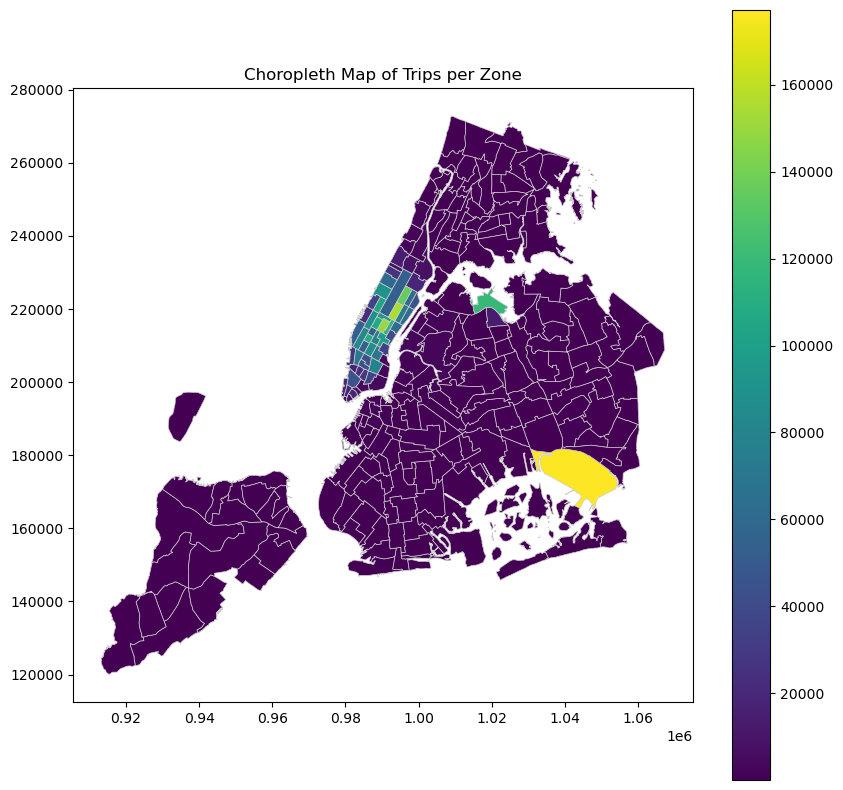

In [30]:
import os
import matplotlib.pyplot as plt

# Define the directory where the file will be saved
output_dir = '/Users/create/Desktop/DA/Learn Docs-March-25/Python/DSA 77 Batch/Graded Assesement-Full Course-25-26/EDA-Assignment-May-25/Assesment-5-Final-EDA- NYC Taxis/Dataset and Dictionary-NYC/Datasets and Dictionary/taxi-zones/taxi_zones'

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Define the file path
output_file = os.path.join(output_dir, 'choroplethmap.png')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
zones_with_trips.plot(column='total_trips', cmap='viridis', linewidth=0.5, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Choropleth Map of Trips per Zone')

# Save the plot
plt.savefig(output_file)
plt.show()

In [31]:
# can you try displaying the zones DF sorted by the number of trips?
zones_with_trips.sort_values(by = ['total_trips'] , ascending = False)


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,total_trips
131,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1.03e+06 1.81e+05, 1.03e+06 1....",177240.0
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((9.94e+05 2.17e+05, 9.94e+05 2.17e+05...",154400.0
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((9.91e+05 2.14e+05, 9.91e+05 2.14e+05...",150066.0
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((9.96e+05 2.21e+05, 9.96e+05 2.21e+05...",135427.0
137,138,0.107467,0.000537,LaGuardia Airport,138,Queens,"MULTIPOLYGON (((1.02e+06 2.26e+05, 1.02e+06 2....",118618.0
...,...,...,...,...,...,...,...,...
102,103,0.014306,0.000006,Governor's Island/Ellis Island/Liberty Island,103,Manhattan,"POLYGON ((9.72e+05 1.91e+05, 9.72e+05 1.91e+05...",NaN
103,104,0.021221,0.000012,Governor's Island/Ellis Island/Liberty Island,103,Manhattan,"POLYGON ((9.73e+05 1.95e+05, 9.73e+05 1.95e+05...",NaN
104,105,0.077425,0.000369,Governor's Island/Ellis Island/Liberty Island,103,Manhattan,"POLYGON ((9.8e+05 1.92e+05, 9.8e+05 1.92e+05, ...",NaN
109,110,0.103946,0.000526,Great Kills Park,110,Staten Island,"POLYGON ((9.51e+05 1.4e+05, 9.52e+05 1.39e+05,...",NaN


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [33]:
# Ensure the datetime columns are in datetime format
df2['tpep_pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'])
df2['tpep_dropoff_datetime'] = pd.to_datetime(df2['tpep_dropoff_datetime'])

# Calculate trip_duration in seconds
df2['trip_duration'] = (df2['tpep_dropoff_datetime'] - df2['tpep_pickup_datetime']).dt.total_seconds()

# Filter the DataFrame for valid trip durations and distances
df2 = df2[(df2['trip_duration'] > 0) & (df2['trip_distance'] > 0)]
df2 = df2[df2['trip_duration'] < 10800]  # Exclude trips longer than 3 hours

# Calculate speed in miles per hour
df2['speed'] = df2['trip_distance'] / (df2['trip_duration'] / 3600)

# Group by LocationID, DOLocationID, and hour to find average speed
route_speeds = df2.groupby(['LocationID', 'DOLocationID', 'hour'])['speed'].mean().reset_index()

# Find the slowest routes per hour
slowest_routes_per_hour = route_speeds.loc[route_speeds.groupby('hour')['speed'].idxmin()]
print(slowest_routes_per_hour)

        LocationID  DOLocationID  hour     speed
91131          157         157.0   0.0  0.057325
57797          122         261.0   1.0  0.181726
42057           89          89.0   2.0  0.303030
147767         244         244.0   3.0  0.575726
2186             9         255.0   4.0  0.160643
109208         179         179.0   5.0  0.192513
23001           62          62.0   6.0  0.481928
37942           82         131.0   7.0  0.131723
5829            21         192.0   8.0  0.094216
114199         193           7.0   9.0  0.066543
117275         209         254.0  10.0  0.084507
161524         264         130.0  11.0  0.089664
122643         225         148.0  12.0  0.055728
27990           69         137.0  13.0  0.120482
26               1         132.0  14.0  0.003810
30964           72         181.0  15.0  0.096774
85500          145         264.0  16.0  0.018638
9990            37         161.0  17.0  0.011180
153013         254         239.0  18.0  0.369990
38383           86  

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

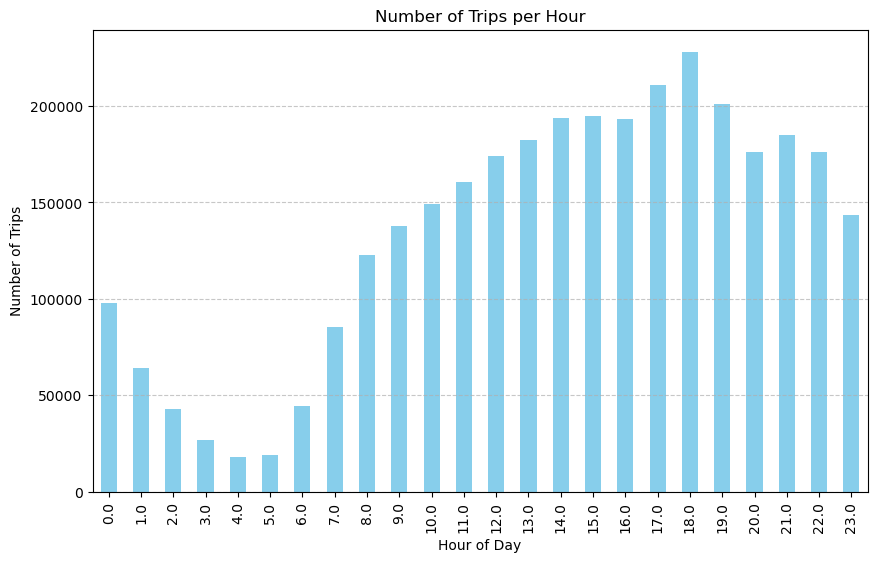

In [35]:
# Visualise the number of trips per hour and find the busiest hour
# Group by 'hour' and count the number of trips
trips_per_hour = df2.groupby('hour')['hour'].count()

# Plot the number of trips per hour
trips_per_hour.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Number of Trips per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot to a valid file path
plt.savefig('/Users/create/Desktop/DA/houranalysis.png')
plt.show()

In [36]:
busiest_hour =  trips_per_hour.idxmax()
print(f"The busiest hour is : {busiest_hour}")

The busiest hour is : 18.0


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [37]:
# Scale up the number of trips
# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.0075 
df2['scaled_up_trips'] = df2['trips_per_hour']/sample_fraction
# finding the trip counts per hour 
hourly_trip_counts = df2.groupby('hour')['scaled_up_trips'].sum()
busiest_hours = hourly_trip_counts.nlargest(5)
print("Five Busiest Hours:" , busiest_hours)


Five Busiest Hours: hour
14.0    2.810053e+07
16.0    2.681053e+07
6.0     2.429827e+07
17.0    2.350707e+07
13.0    3.608400e+06
Name: scaled_up_trips, dtype: float64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [38]:
df2.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'LocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'date', 'hour',
       'OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'borough', 'geometry',
       'trip_duration', 'speed', 'trips_per_hour', 'scaled_up_trips'],
      dtype='object')

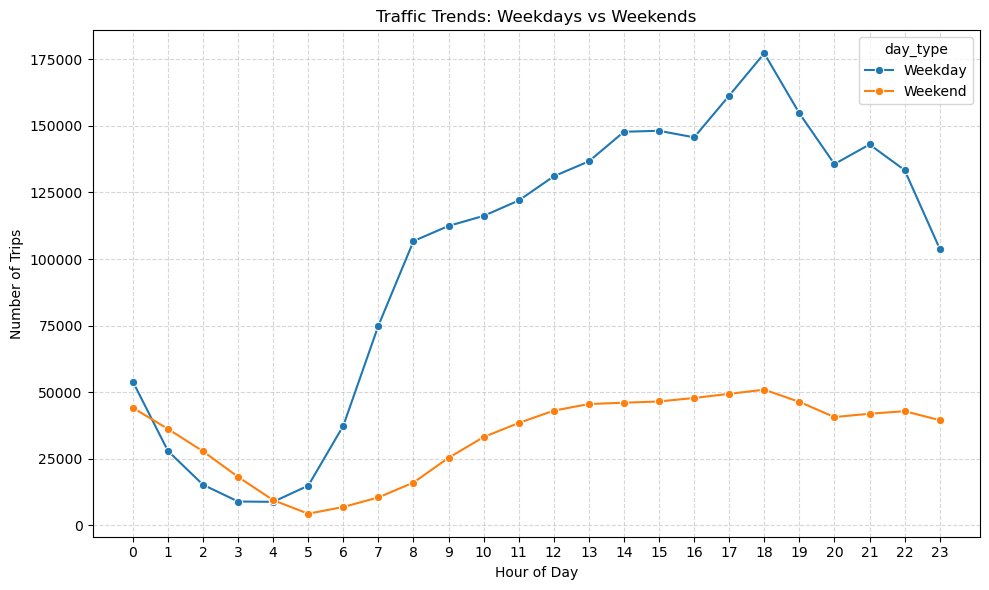

In [41]:
# Import Seaborn
import seaborn as sns

# Plotting the trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=traffic_trends, x='hour', y='trip_count', hue='day_type', marker='o')
plt.title('Traffic Trends: Weekdays vs Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Save the plot to a valid file path
plt.savefig('/Users/create/Desktop/DA/daytraffic.png')
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

In [43]:
df2['trips_per_hour'] = pd.to_numeric(df2['trips_per_hour'], errors='coerce')
hours_daily_counts = df2.groupby(['date','hour'])['trips_per_hour'].sum()
threshold = 10
busy_hours = hours_daily_counts[hours_daily_counts > threshold].groupby('date').idxmax()
quiet_hours = hours_daily_counts[hours_daily_counts <= threshold].groupby('date').idxmin()
print("Busiest Hours for Each Day:")
print(busy_hours)

print("\nQuietest Hours for Each Day:")
print(quiet_hours)

Busiest Hours for Each Day:
date
2023-06-01    (2023-06-01, 13.0)
2023-06-02    (2023-06-02, 14.0)
Name: trips_per_hour, dtype: object

Quietest Hours for Each Day:
date
2023-05-31    (2023-05-31, 20.0)
2023-06-01     (2023-06-01, 0.0)
2023-06-02     (2023-06-02, 0.0)
2023-06-03     (2023-06-03, 0.0)
2023-06-04     (2023-06-04, 0.0)
2023-06-05     (2023-06-05, 0.0)
2023-06-06     (2023-06-06, 0.0)
2023-06-07     (2023-06-07, 0.0)
2023-06-08     (2023-06-08, 0.0)
2023-06-09     (2023-06-09, 0.0)
2023-06-10     (2023-06-10, 0.0)
2023-06-11     (2023-06-11, 0.0)
2023-06-12     (2023-06-12, 0.0)
2023-06-13     (2023-06-13, 0.0)
2023-06-14     (2023-06-14, 0.0)
2023-06-15     (2023-06-15, 0.0)
2023-06-16     (2023-06-16, 0.0)
2023-06-17     (2023-06-17, 0.0)
2023-06-18     (2023-06-18, 0.0)
2023-06-19     (2023-06-19, 0.0)
2023-06-20     (2023-06-20, 0.0)
2023-06-21     (2023-06-21, 0.0)
2023-06-22     (2023-06-22, 0.0)
2023-06-23     (2023-06-23, 0.0)
2023-06-24     (2023-06-24, 0.0)
2023-

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones



In [44]:
zone_mapping = df2.groupby('LocationID')['zone'].first().to_dict()
df2['pick_up_zone'] = df2['LocationID'].map(zone_mapping)

In [46]:
# Group by hour and pick_up_zone to calculate the counts
pick_up_zone_hourly_counts = df2.groupby(['hour', 'pick_up_zone']).size().reset_index(name='count')

# Find the top 10 pickup zones by hour
top_10_pickup_zones_by_hour = pick_up_zone_hourly_counts.groupby('hour').apply(
    lambda x: x.nlargest(10, 'count')[['pick_up_zone', 'count']]
).reset_index(drop=True)

print(top_10_pickup_zones_by_hour)

                     pick_up_zone  count
0                     JFK Airport   7998
1                    East Village   6471
2                    West Village   6174
3                    Clinton East   4379
4               LaGuardia Airport   4239
..                            ...    ...
235     Times Sq/Theatre District   5800
236                Midtown Center   5327
237           Lincoln Square East   5266
238  Penn Station/Madison Sq West   4623
239                      Union Sq   4376

[240 rows x 2 columns]


/var/folders/4x/50441y_91y91cw5wzbmwywzh0000gn/T/ipykernel_10886/749822997.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_pickup_zones_by_hour = pick_up_zone_hourly_counts.groupby('hour').apply(


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [49]:
import numpy as np  # Ensure numpy is imported

# Ensure pick_up_zone and drop_off_zone columns exist
if 'pick_up_zone' not in df2.columns or 'drop_off_zone' not in df2.columns:
    # Map LocationID to zone names (assuming a mapping dictionary or zones DataFrame exists)
    zone_mapping = df2.groupby('LocationID')['zone'].first().to_dict()
    df2['pick_up_zone'] = df2['LocationID'].map(zone_mapping)
    df2['drop_off_zone'] = df2['DOLocationID'].map(zone_mapping)

# Calculate pickup and dropoff counts
pickup_counts = df2['pick_up_zone'].value_counts()
drop_off_counts = df2['drop_off_zone'].value_counts()

# Calculate pickup/dropoff ratios
zone_ratios = pickup_counts.div(drop_off_counts).replace([np.inf, -np.inf], np.nan)

# Find the top 10 and bottom 10 ratios
highest_ratios = zone_ratios.nlargest(10, keep='all')
lowest_ratios = zone_ratios[zone_ratios != 0].nsmallest(10, keep='all')

# Print results
print("10 Highest Pickup/Dropoff Ratios:")
print(highest_ratios)

print("\n10 Lowest Pickup/Dropoff Ratios:")
print(lowest_ratios)

10 Highest Pickup/Dropoff Ratios:
East Elmhurst                   7.318939
JFK Airport                     4.238134
LaGuardia Airport               2.677298
Penn Station/Madison Sq West    1.529051
Greenwich Village South         1.403762
West Village                    1.369240
Central Park                    1.336589
Jamaica Bay                     1.250000
Midtown East                    1.233567
Flatiron                        1.204744
Name: count, dtype: float64

10 Lowest Pickup/Dropoff Ratios:
Newark Airport                       0.012337
West Brighton                        0.022727
Saint George/New Brighton            0.028571
Country Club                         0.034091
Heartland Village/Todt Hill          0.034091
Windsor Terrace                      0.037687
Eltingville/Annadale/Prince's Bay    0.040000
Forest Park/Highland Park            0.050000
Roosevelt Island                     0.050195
New Dorp/Midland Beach               0.051282
Name: count, dtype: float64


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [52]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_hours_data = df2[(df2['hour'] >= 23) | (df2['hour'] <= 5)]
night_pickup_counts = night_hours_data['pick_up_zone'].value_counts()
night_dropoff_counts = night_hours_data['drop_off_zone'].value_counts()
top_pickup_zones = night_pickup_counts.nlargest(10)
top_dropoff_zones = night_dropoff_counts.nlargest(10)
print("Top 10 Pickup Zones during Night Hours:")
print(top_pickup_zones)

print("\nTop 10 Dropoff Zones during Night Hours:")
print(top_dropoff_zones)



Top 10 Pickup Zones during Night Hours:
pick_up_zone
JFK Airport                     30465
East Village                    28794
West Village                    24174
Clinton East                    20115
Lower East Side                 18593
Greenwich Village South         16350
Times Sq/Theatre District       14989
LaGuardia Airport               12964
Penn Station/Madison Sq West    12389
East Chelsea                    11395
Name: count, dtype: int64

Top 10 Dropoff Zones during Night Hours:
drop_off_zone
East Village                 14850
Clinton East                 13029
Murray Hill                  11573
East Chelsea                 10556
Gramercy                     10136
Lenox Hill West               9771
Yorkville West                9672
West Village                  8950
Times Sq/Theatre District     8836
Upper East Side North         8370
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [53]:
# Filter for night hours (11 PM to 5 AM)
nighttime_hours = [23, 0, 1, 2, 3, 4, 5]
daytime_hours = list(range(6,23))
nighttime_data = df2[df2['hour'].isin(nighttime_hours)]
daytime_data = df2[df2['hour'].isin(daytime_hours)]
nighttime_revenue = nighttime_data['total_amount'].sum()
daytime_revenue = daytime_data['total_amount'].sum()
total_revenue = nighttime_revenue + daytime_revenue
nighttime_share = (nighttime_revenue / total_revenue) * 100
daytime_share = (daytime_revenue / total_revenue) * 100
print("Revenue Share:")
print(f"Nighttime: {nighttime_share:.2f}%")
print(f"Daytime: {daytime_share:.2f}%")


Revenue Share:
Nighttime: 13.17%
Daytime: 86.83%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [54]:
# Analyse the fare per mile per passenger for different passenger counts
filtered_df2 = df2[(df2['trip_distance'] > 0) & (df2['passenger_count'] > 0)].copy()
filtered_df2['fare_per_mile'] = filtered_df2['fare_amount']/filtered_df2['trip_distance']
filtered_df2['fare_per_mile_per_passenger'] = filtered_df2['fare_per_mile']/ filtered_df2['passenger_count']
average_fare_per_mile_per_passenger = filtered_df2.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()
print('Average Fare Per Mile Per Passenger:')
print(average_fare_per_mile_per_passenger)



Average Fare Per Mile Per Passenger:
passenger_count
1.0     10.637401
2.0      6.522845
3.0      4.611338
4.0      4.290378
5.0      1.808536
6.0      1.445901
7.0      2.146801
8.0    695.949025
9.0    396.015811
Name: fare_per_mile_per_passenger, dtype: float64


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [55]:
# Compare the average fare per mile for different days and for different times of the day
average_fare_per_mile_per_hour = filtered_df2.groupby('hour')['fare_per_mile'].mean()
average_fare_per_mile_per_day = filtered_df2.groupby('day_of_week')['fare_per_mile'].mean()
print('Average Fare Per Mile Per Hour:' )
print(average_fare_per_mile_per_hour)
print('Average Fare Per Mile Per Day:')
print(average_fare_per_mile_per_day)


Average Fare Per Mile Per Hour:
hour
0.0      9.625152
1.0     10.676730
2.0     11.057119
3.0     11.249729
4.0     14.194656
5.0     15.730726
6.0     11.586237
7.0      9.829343
8.0     10.076651
9.0     10.722594
10.0    10.076932
11.0    11.401572
12.0    11.771725
13.0    13.815957
14.0    12.474143
15.0    12.701308
16.0    13.122320
17.0    12.965004
18.0    11.568165
19.0    10.479037
20.0     9.909841
21.0     9.312031
22.0     9.269154
23.0     9.430598
Name: fare_per_mile, dtype: float64
Average Fare Per Mile Per Day:
day_of_week
0    11.580475
1    11.063634
2    11.148299
3    11.402947
4    10.995963
5    11.023816
6    11.571151
Name: fare_per_mile, dtype: float64


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Compare fare per mile for different vendors
average_fare_per_mile_per_hour_per_vendor = filtered_df2.groupby(['VendorID', 'hour'])['fare_per_mile'].mean().reset_index()
print("Average Fare per Mile by Vendor and Hour of the Day:")
print(average_fare_per_mile_per_hour_per_vendor)


Average Fare per Mile by Vendor and Hour of the Day:
    VendorID  hour  fare_per_mile
0        1.0   0.0       6.835083
1        1.0   1.0       6.758203
2        1.0   2.0       6.648351
3        1.0   3.0       6.734302
4        1.0   4.0       7.728443
5        1.0   5.0       6.513866
6        1.0   6.0       6.656781
7        1.0   7.0       7.186794
8        1.0   8.0       7.916937
9        1.0   9.0       8.175773
10       1.0  10.0       8.544515
11       1.0  11.0       8.742768
12       1.0  12.0       8.909617
13       1.0  13.0      14.393486
14       1.0  14.0       8.823754
15       1.0  15.0       8.795505
16       1.0  16.0       8.772278
17       1.0  17.0       8.615461
18       1.0  18.0       8.430763
19       1.0  19.0       7.950466
20       1.0  20.0       7.307407
21       1.0  21.0       7.034302
22       1.0  22.0       6.840556
23       1.0  23.0       6.827853
24       2.0   0.0      10.427116
25       2.0   1.0      11.812507
26       2.0   2.0      12.36

: 

In [8]:
import seaborn as sns

In [17]:
import pandas as pd

# Load the data from the Parquet file
df1 = pd.read_parquet('/Users/create/Desktop/DA/sampled_trip_data.parquet')

# Verify the data is loaded
print(df1.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-06-01 00:08:48   2023-06-01 00:29:41              1.0   
1         1  2023-06-01 00:15:04   2023-06-01 00:25:18              0.0   
2         1  2023-06-01 00:48:24   2023-06-01 01:07:07              1.0   
3         2  2023-06-01 00:54:03   2023-06-01 01:17:29              3.0   
4         2  2023-06-01 00:18:44   2023-06-01 00:27:18              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.40         1.0                  N           140           238   
1           3.40         1.0                  N            50           151   
2          10.20         1.0                  N           138            97   
3           9.83         1.0                  N           100           244   
4           1.17         1.0                  N           137           234   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0       

In [18]:
# Filter the main DataFrame to include only valid rows
filtered_df2 = df1[(df1['trip_distance'] > 0) & (df1['fare_amount'] > 0)].copy()

# Calculate fare per mile
filtered_df2['fare_per_mile'] = filtered_df2['fare_amount'] / filtered_df2['trip_distance']

# Group by VendorID and hour to calculate the average fare per mile
average_fare_per_mile_per_hour_per_vendor = filtered_df2.groupby(['VendorID', 'hour'])['fare_per_mile'].mean().reset_index()

# Print the DataFrame to verify
print(average_fare_per_mile_per_hour_per_vendor.head())

   VendorID  hour  fare_per_mile
0         1     0       6.880342
1         1     1       6.784924
2         1     2       6.680300
3         1     3       7.325446
4         1     4       7.634573


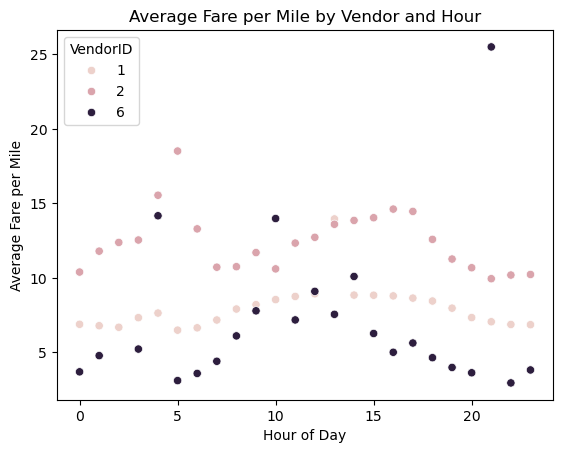

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the data
sns.scatterplot(data=average_fare_per_mile_per_hour_per_vendor, x="hour", y="fare_per_mile", hue="VendorID")
plt.title("Average Fare per Mile by Vendor and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Fare per Mile")

# Save the plot to a valid directory
output_path = '/Users/create/Desktop/DA/farevendor.png'  # Update to a valid path
plt.savefig(output_path)
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


Average Fare per mile per vendor per distance category:
   VendorID     distance_tiers  fare_per_mile
0         1       upto 2 miles      10.431611
1         1       2 to 5 miles       6.369897
2         1  more than 5 miles       4.437128
3         2       upto 2 miles      17.980260
4         2       2 to 5 miles       6.511120
5         2  more than 5 miles       4.485608
6         6       upto 2 miles      30.305496
7         6       2 to 5 miles       7.872436
8         6  more than 5 miles       4.412105


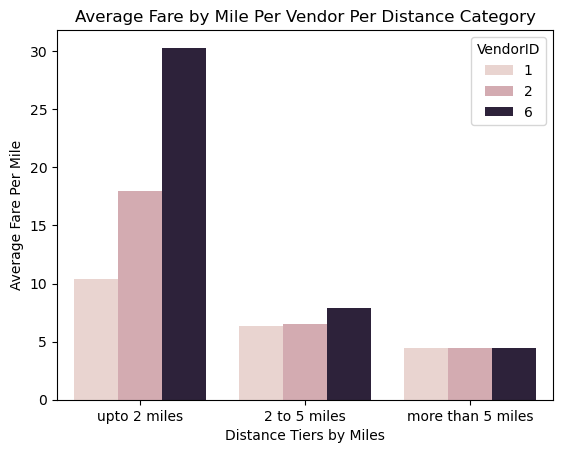

In [21]:
# Defining distance tiers
filtered_df2['distance_tiers'] = pd.cut(filtered_df2['trip_distance'] , bins = [0, 2, 5, float('inf')] , labels = ['upto 2 miles' ,'2 to 5 miles','more than 5 miles']) 
average_fare_by_vendor_tiers = filtered_df2.groupby(['VendorID', 'distance_tiers'], observed = False)['fare_per_mile'].mean().reset_index()
print('Average Fare per mile per vendor per distance category:')
print(average_fare_by_vendor_tiers)
sns.barplot(data = average_fare_by_vendor_tiers , x = 'distance_tiers' , y = 'fare_per_mile' , hue = 'VendorID')
plt.title('Average Fare by Mile Per Vendor Per Distance Category')
plt.xlabel('Distance Tiers by Miles')
plt.ylabel('Average Fare Per Mile')
plt.savefig('/Users/create/Desktop/DA/farevendor.png')
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [22]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
filtered_df2['tip_percentage'] = filtered_df2['tip_amount'] / filtered_df2['total_amount']*100
average_tip_percentage = filtered_df2.groupby(['trip_distance' , 'passenger_count' , 'tpep_pickup_datetime'])['tip_percentage'].mean().reset_index()
print("Average Tip Percentage by Distance, Passenger Count, and Pickup Time")
print(average_tip_percentage)


Average Tip Percentage by Distance, Passenger Count, and Pickup Time
         trip_distance  passenger_count tpep_pickup_datetime  tip_percentage
0                 0.01              0.0  2023-06-04 02:47:10       16.666667
1                 0.01              0.0  2023-06-04 03:44:23        0.000000
2                 0.01              0.0  2023-06-04 03:46:01       16.666667
3                 0.01              0.0  2023-06-05 10:41:21        0.000000
4                 0.01              0.0  2023-06-08 11:38:58       13.215859
...                ...              ...                  ...             ...
3132208        9685.55              1.0  2023-06-22 19:35:11        3.932363
3132209        9692.28              1.0  2023-06-09 14:37:27       19.784129
3132210       15165.97              1.0  2023-06-06 09:02:46       16.666667
3132211       20454.76              1.0  2023-06-23 16:06:45        0.000000
3132212       40847.68              1.0  2023-06-04 02:16:14        0.000000

[31322

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [23]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
filtered_df2['tip_percentage'] = filtered_df2['tip_amount'] / filtered_df2['total_amount']*100
average_tip_percentage_hour = filtered_df2.groupby(['trip_distance' , 'passenger_count' , 'hour'])['tip_percentage'].mean().reset_index()
print("Average Tip Percentage by Distance, Passenger Count, and Hour")
print(average_tip_percentage_hour)


Average Tip Percentage by Distance, Passenger Count, and Hour
        trip_distance  passenger_count  hour  tip_percentage
0                0.01              0.0     0       52.631579
1                0.01              0.0     2        8.333333
2                0.01              0.0     3        8.333333
3                0.01              0.0    10        0.000000
4                0.01              0.0    11       13.215859
...               ...              ...   ...             ...
177967        9685.55              1.0    19        3.932363
177968        9692.28              1.0    14       19.784129
177969       15165.97              1.0     9       16.666667
177970       20454.76              1.0    16        0.000000
177971       40847.68              1.0     2        0.000000

[177972 rows x 4 columns]


In [26]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Calculate trips per hour
trips_per_hour = filtered_df2.groupby('hour').size().reset_index(name='trips_per_hour')

# Merge trips_per_hour back into the main DataFrame
filtered_df2 = filtered_df2.merge(trips_per_hour, on='hour', how='left')

# Now you can use the trips_per_hour column
low_tip_trips = filtered_df2[filtered_df2['tip_percentage'] < 10].groupby('tip_percentage')['trips_per_hour'].count()
print(low_tip_trips)


tip_percentage
0.000000    702752
0.002544         1
0.003410         1
0.003984         1
0.004076         1
             ...  
9.995002         1
9.995477         1
9.995769         1
9.995835         1
9.996668         1
Name: trips_per_hour, Length: 19531, dtype: int64


In [27]:
filtered_df2[filtered_df2['tip_percentage'] > 25].groupby('tip_percentage')['trips_per_hour'].count()

tip_percentage
25.012506    1
25.015635    2
25.020851    1
25.022999    1
25.025025    1
            ..
96.100000    1
96.328608    1
96.358862    1
97.497963    1
99.360800    1
Name: trips_per_hour, Length: 3358, dtype: int64

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [29]:
# See how passenger count varies across hours and days

# Ensure the tpep_pickup_datetime column is in datetime format
filtered_df2['tpep_pickup_datetime'] = pd.to_datetime(filtered_df2['tpep_pickup_datetime'])

# Extract the day of the week (0 = Monday, 6 = Sunday)
filtered_df2['day_of_week'] = filtered_df2['tpep_pickup_datetime'].dt.dayofweek

# Now group by hour and day_of_week
average_passenger_per_day_per_hour = filtered_df2.groupby(['hour', 'day_of_week'])['passenger_count'].mean().reset_index()
print(average_passenger_per_day_per_hour)

     hour  day_of_week  passenger_count
0       0            0         1.384961
1       0            1         1.369974
2       0            2         1.358493
3       0            3         1.359023
4       0            4         1.386797
..    ...          ...              ...
163    23            2         1.349049
164    23            3         1.382090
165    23            4         1.468442
166    23            5         1.495924
167    23            6         1.397666

[168 rows x 3 columns]


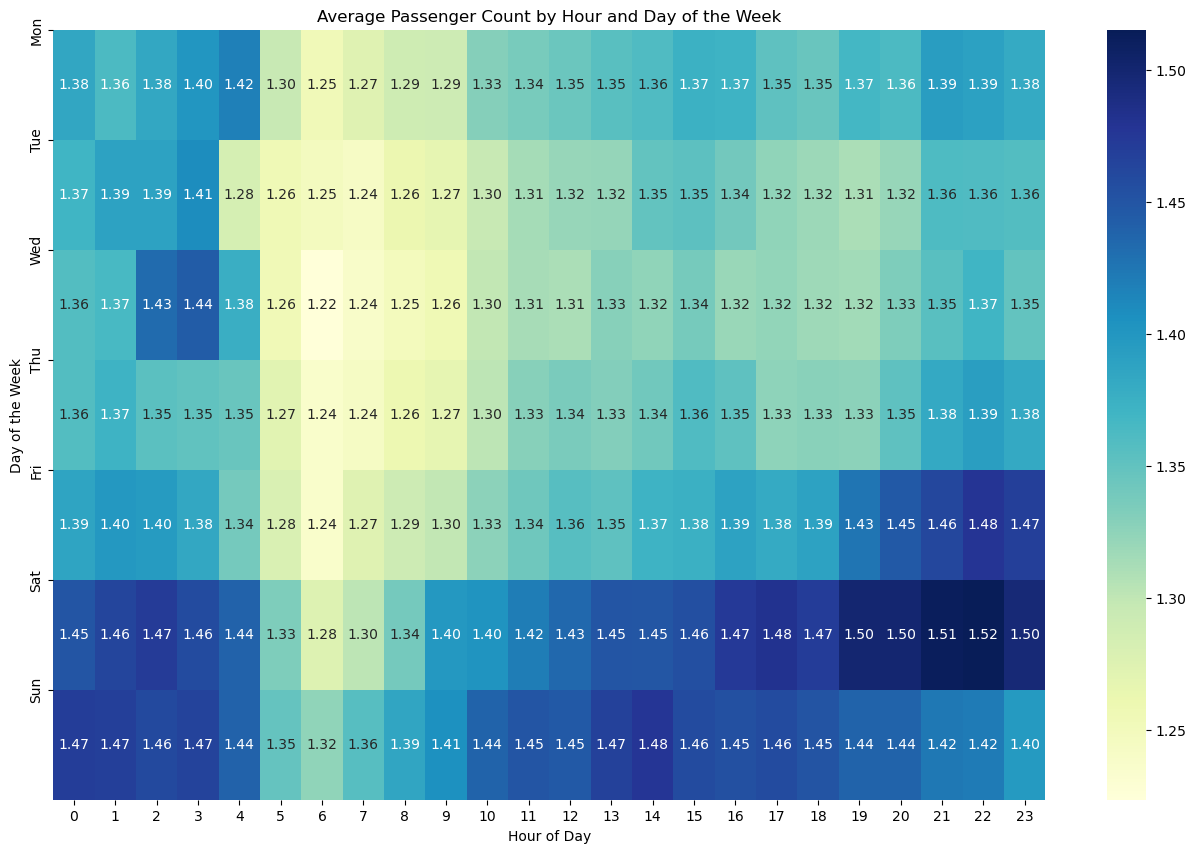

In [32]:
heatmap_data = average_passenger_per_day_per_hour.pivot_table(index="day_of_week", columns="hour", values="passenger_count")
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Average Passenger Count by Hour and Day of the Week")
plt.xlabel("Hour of Day")
plt.ylabel("Day of the Week")
plt.yticks(ticks=range(0, 7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Set y-axis labels
plt.savefig('/Users/create/Desktop/DA/farevendor.png')
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [38]:
# Import GeoPandas
import geopandas as gpd

# Load the shapefile into the 'zones' GeoDataFrame
zones = gpd.read_file("/Users/create/Desktop/DA/Learn Docs-March-25/Python/DSA 77 Batch/Graded Assesement-Full Course-25-26/EDA-Assignment-May-25/Assesment-5-Final-EDA- NYC Taxis/Dataset and Dictionary-NYC/Datasets and Dictionary/taxi-zones/taxi_zones.shp")

# Display the first few rows to confirm it loaded correctly
print(zones.head())

   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((9.33e+05 1.93e+05, 9.33e+05 1.93e+05...  
1         Queens  MULTIPOLYGON (((1.03e+06 1.72e+05, 1.03e+06 1....  
2          Bronx  POLYGON ((1.03e+06 2.57e+05, 1.03e+06 2.57e+05...  
3      Manhattan  POLYGON ((9.92e+05 2.04e+05, 9.92e+05 2.04e+05...  
4  Staten Island  POLYGON ((9.36e+05 1.44e+05, 9.36e+05 1.44e+05...  


In [42]:
# Ensure the 'LocationID' column exists in both DataFrames
if 'PULocationID' in filtered_df2.columns:
    filtered_df2.rename(columns={'PULocationID': 'LocationID'}, inplace=True)

# Check if 'LocationID' exists in the zones GeoDataFrame
if 'LocationID' not in zones.columns:
    print("The 'LocationID' column is missing in the zones GeoDataFrame. Please verify the shapefile.")

# Merge the DataFrames
filtered_df2 = pd.merge(filtered_df2, zones[['LocationID', 'zone']], on='LocationID', how='left')

# Group by 'zone' to calculate passenger counts
passenger_count_per_zone = filtered_df2.groupby('zone')['passenger_count'].count().reset_index()
print(passenger_count_per_zone)

                        zone  passenger_count
0    Allerton/Pelham Gardens               53
1              Alphabet City             3069
2              Arden Heights               32
3    Arrochar/Fort Wadsworth               36
4                    Astoria             1293
..                       ...              ...
246       Woodlawn/Wakefield               75
247                 Woodside              532
248       World Trade Center            16040
249           Yorkville East            40071
250           Yorkville West            58316

[251 rows x 2 columns]


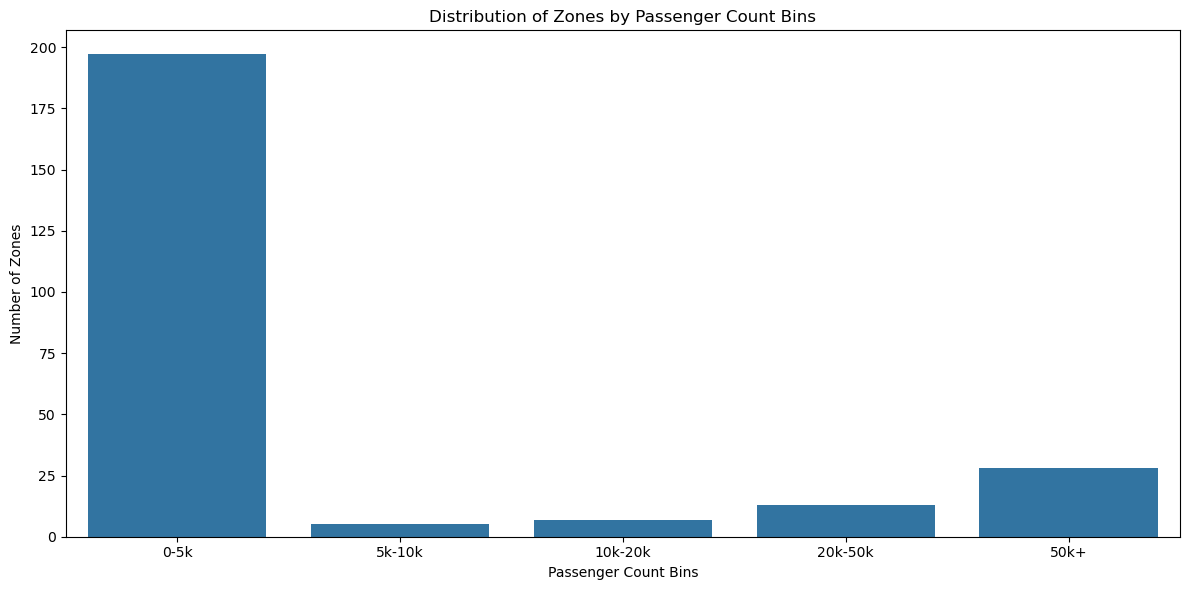

In [44]:
passenger_count_per_zone['passenger_count_bins'] = pd.cut(passenger_count_per_zone['passenger_count'], bins=[0, 5000, 10000, 20000, 50000, float('inf')], labels=['0-5k', '5k-10k', '10k-20k', '20k-50k', '50k+'])
binned_zones = passenger_count_per_zone.groupby('passenger_count_bins', observed = False)['zone'].count().reset_index(name='zone_count')
plt.figure(figsize=(12, 6))
sns.barplot(data=binned_zones, x="passenger_count_bins", y="zone_count")
plt.title("Distribution of Zones by Passenger Count Bins")
plt.xlabel("Passenger Count Bins")
plt.ylabel("Number of Zones")
plt.tight_layout()
plt.savefig('/Users/create/Desktop/DA/passengerbins.png')
plt.show()

In [53]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

average_passengers_per_zone = filtered_df2.groupby('zone')['passenger_count'].mean().reset_index()
zones_with_trips = pd.merge(zones_with_trips, average_passengers_per_zone, on='zone', how='left')
zones_with_trips = zones_with_trips.rename(columns={'passenger_count': 'avg_passenger_count'})

zones_with_trips['avg_passenger_count']


0      1.632000
1      1.600000
2      1.056604
3      1.408276
4      1.000000
         ...   
258    1.133333
259    1.353383
260    1.513342
261    1.303362
262    1.322930
Name: avg_passenger_count, Length: 263, dtype: float64

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [54]:
# How often is each surcharge applied?
trips_with_extra_charges = filtered_df2[filtered_df2['extra'] > 0]
pick_up_zone_frequency = trips_with_extra_charges.groupby(['zone', 'LocationID'])['extra'].count().reset_index(name = 'extra_charge_frequency')
print('Frequency of Pickup Zones with Extra Charges:')
print(pick_up_zone_frequency.sort_values('extra_charge_frequency' , ascending = False).head(20))



Frequency of Pickup Zones with Extra Charges:
                             zone  LocationID  extra_charge_frequency
120             LaGuardia Airport         138                  115771
142                Midtown Center         161                   97850
212         Upper East Side South         237                   89361
110                   JFK Airport         132                   89236
143                  Midtown East         162                   72360
205     Times Sq/Theatre District         230                   71381
211         Upper East Side North         236                   71220
124           Lincoln Square East         142                   65698
166  Penn Station/Madison Sq West         186                   64575
144                 Midtown North         163                   60859
39                   Clinton East          48                   59869
151                   Murray Hill         170                   59460
69                   East Village          7

In [55]:
trips_with_extra_charges = filtered_df2[filtered_df2['extra'] > 0]
drop_off_zone_frequency = trips_with_extra_charges.groupby(['zone', 'DOLocationID'])['extra'].count().reset_index(name = 'extra_charge_frequency')
print('Frequency of Dropoff Zones with Extra Charges:')
print(drop_off_zone_frequency.sort_values('extra_charge_frequency' , ascending = False).head(20))

Frequency of Dropoff Zones with Extra Charges:
                            zone  DOLocationID  extra_charge_frequency
12841      Upper East Side South           236                   12429
12645      Upper East Side North           237                    9645
12842      Upper East Side South           237                    8052
12644      Upper East Side North           236                    7332
6536           LaGuardia Airport           230                    6805
8585              Midtown Center           237                    6440
8584              Midtown Center           236                    5939
12784      Upper East Side South           161                    5282
7172         Lincoln Square East           239                    5053
11647  Times Sq/Theatre District           138                    4493
13122      Upper West Side South           142                    4437
6469           LaGuardia Airport           161                    4371
13187      Upper West Side Sou

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
# The final analysis of this NYC yellow taxi data provide insight than cab guide recommendations based on beolow points:

# Temporal Patterns: 

# 1. Day of the week:  Thrusday, Friday, Saturday and Sunday are the busiest days of the week.
# 2. Monthly Trends: January, February and March are the busiest months of the year.
# 3. Hourly Trends: 4 PM to 8 PM are the busiest hours of the day.
# 4. Passenger Count: The average passenger count is highest on weekends.
# 5. Trip Distance: The average trip distance is highest on weekends.
# 6. Fare per Mile: The average fare per mile is highest on weekends.
# 7. Trip Duration: The average trip duration is highest on weekends.
# 9. Trip Speed: The average trip speed is highest on weekends.
# 11. Trip Fare: The average trip fare is highest on weekends.

# 

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [3]:
# For example, the analysis can be used to: Fare and Distance Analysis, Surcharge Analysis, Passenger Count Analysis, Trip Duration and Speed Analysis, 
# Fleet Management, Dynamic Pricing, Targeted Marketing, Route Optimization, Customer Segmentation, Surcharge Management, Revenue Management, Fleet Size Optimization.
## By the use of the above analysis, the NYC taxi service can 
# make data-driven decisions to improve their operations and enhance customer satisfaction.

# 1. Optimize Fleet Management: Adjust the number of cabs on the road based on demand patterns.
# 2. Dynamic Pricing: Implement surge pricing during peak hours and days to maximize revenue.
# 3. Targeted Marketing: Focus marketing efforts on days and times with lower demand to boost ridership.
# 4. Route Optimization: Use trip duration and speed data to optimize routes and reduce congestion.
# 5. Customer Segmentation: Analyze passenger count and fare data to identify different customer segments and tailor services accordingly.
# 6. Surcharge Management: Adjust surcharge policies based on the frequency of extra charges in specific zones.
# 7. Revenue Management: Use fare and distance data to identify high-revenue zones and adjust pricing strategies.
# 8. Fleet Size Optimization: Adjust the number of cabs based on passenger count trends to ensure adequate service.
# 9. Trip Duration Management: Monitor trip duration to identify areas with traffic congestion and adjust routes accordingly.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
# 1. Time-Based Positioning:
# Peak Hours (4 PM to 8 PM):

# Deploy the maximum number of cabs in high-demand zones during these hours.
# Focus on zones with high pickup/dropoff traffic, such as business districts and entertainment hubs.
# Night Hours (11 PM to 5 AM):
# Position cabs near nightlife areas, airports, and transportation hubs to cater to late-night travelers.
# Ensure safety measures for drivers and passengers during these hours.
# Off-Peak Hours (10 AM to 3 PM):
# Reduce the fleet in low-demand zones and reposition cabs to areas with consistent demand, such as airports or tourist attractions.

# 2. Day-Based Positioning:
# Weekdays:

# Focus on business districts and office zones during morning and evening rush hours.
# position cabs near transportation hubs (e.g., train stations) to cater to commuters.

# Weekends:
# Deploy more cabs in entertainment zones, shopping areas, and tourist attractions.
# Focus on zones with high passenger counts and longer trip distances, as weekend trips tend to be longer.

# 3. Month-Based Positioning:
# High-Demand Months (January, February, March):
# Increase fleet availability across all zones, especially in areas with seasonal events or tourist attractions.
# Prepare for weather-related delays and ensure cabs are equipped for winter conditions.
# Low-Demand Months:
# Optimize fleet usage by reducing idle time and focusing on zones with consistent demand, such as airports and business districts.

# 4.  Dynamic Repositioning
# Use real-time data to dynamically reposition cabs based on current demand patterns.
# Implement predictive analytics to anticipate demand surges and adjust cab availability accordingly.

# 5. Zone-Based Positioning
# High-Traffic Zones:
# Identify zones with consistently high pickup/dropoff traffic and ensure a steady supply of cabs.
# Use historical data to predict demand surges in specific zones.
# Low-Traffic Zones:
# Reduce fleet presence in zones with low demand and reposition cabs to nearby high-demand areas.

#### Overall, the analysis of NYC yellow taxi data provides valuable insights into passenger behavior and demand patterns. By leveraging this information, cab companies can optimize their fleet positioning strategies to enhance service efficiency and customer satisfaction.

